In [1125]:
import warnings
warnings.filterwarnings('ignore')


In [1126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Steps :
1. Data Understanding 
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Model Buiding and Evaluation

### Step1. Data Understanding 

Load Data

In [1701]:
# load data 
house_df = pd.read_csv("houseAus.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking total columns and rows

In [1702]:
# shape
initial_rows = house_df.shape[0] # for calculating loss percent after data cleaning
house_df.shape


(1460, 81)

Analysing data types of different column with not null values

In [1703]:
#inspect
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analysing Numerical columns,
- mean median difference
- presence of outlier.
- min and max value in variable.


In [1704]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Inspecting Skewness of data

In [1705]:
# skewness
house_df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

Observation:
- Some columns are highly skewed having skewness 24,14,12,10,9

### Step 2 Data Cleaning


First dropping 'Id' column as it is redundant , already dataframe as default index.

In [1706]:
# drop Id Column
house_df.drop('Id',axis = 1, inplace = True)

#### Handling Missing values

In [1707]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

##### Display only those columns which having missing value.

In [1708]:
# missing value in columns:

missing_value = round(100*house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage     17.73973
Alley           93.76712
MasVnrType       0.54795
MasVnrArea       0.54795
BsmtQual         2.53425
BsmtCond         2.53425
BsmtExposure     2.60274
BsmtFinType1     2.53425
BsmtFinType2     2.60274
Electrical       0.06849
FireplaceQu     47.26027
GarageType       5.54795
GarageYrBlt      5.54795
GarageFinish     5.54795
GarageQual       5.54795
GarageCond       5.54795
PoolQC          99.52055
Fence           80.75342
MiscFeature     96.30137
dtype: float64

Observation
- Some columns are having more than 45% missing value.
- Dropping those columns.
- column names "MiscFeature","Fence","PoolQC","FireplaceQu","Alley"

In [1709]:
# drop columns:
house_df.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley"],axis = 1, inplace = True)

# verify missing percentage in rest of columns
missing_value = round(100*house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]


LotFrontage     17.73973
MasVnrType       0.54795
MasVnrArea       0.54795
BsmtQual         2.53425
BsmtCond         2.53425
BsmtExposure     2.60274
BsmtFinType1     2.53425
BsmtFinType2     2.60274
Electrical       0.06849
GarageType       5.54795
GarageYrBlt      5.54795
GarageFinish     5.54795
GarageQual       5.54795
GarageCond       5.54795
dtype: float64

 Observation
 - Only one column have 17% missing value and rest other columns have missing values 5% or less than that.
 - Lets analyses these columns first. 



##### Analyze all  the columns having missing values related to __'Garage'__

In [1710]:
#columns related to garage having same missing value, it may be they coreespond to same column
house_df[missing_value[missing_value == 5.54795].index].head()


,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA


In [1711]:
house_df['GarageCond'].value_counts(normalize = True)

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

In [1712]:
house_df['GarageQual'].value_counts(normalize = True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

Observation:
- __GarageQual__ and __GarageCond__ are highly skewed.More than 95% values are same.
- These two columns would be dropped in EDA after analysing further.

In [1713]:
house_df['GarageType'].value_counts(normalize = True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [1714]:
house_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Observation:
- In __GarageType__ and __GarageFinish__ data is not skewed .
- Lets not impute the value and remove rows with missing value, as percentage of missing value is also less.

In [1715]:
# dropping rows
house_df = house_df[~pd.isnull(house_df['GarageType'])]

# further analysing other missing values 
missing_value = round(100*house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]


LotFrontage     18.27411
MasVnrType       0.58013
MasVnrArea       0.58013
BsmtQual         2.17549
BsmtCond         2.17549
BsmtExposure     2.24801
BsmtFinType1     2.17549
BsmtFinType2     2.24801
Electrical       0.07252
dtype: float64

##### Analyze all the columns having missing value related to __Basement__

In [1716]:
print("Missing percentage in Basement related columns")
print("-"*30)
round(100*(house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().sum()/len(house_df)),5)

Missing percentage in Basement related columns
------------------------------


BsmtQual        2.17549
BsmtCond        2.17549
BsmtExposure    2.24801
BsmtFinType1    2.17549
BsmtFinType2    2.24801
dtype: float64

In [1717]:
house_df['BsmtQual'].value_counts() 

Gd    601
TA    595
Ex    121
Fa     32
Name: BsmtQual, dtype: int64

In [1718]:
house_df['BsmtCond'].value_counts(normalize = True)

TA    0.924388
Gd    0.046701
Fa    0.028169
Po    0.000741
Name: BsmtCond, dtype: float64

In [1719]:
house_df['BsmtFinType1'].value_counts(normalize = True)

GLQ    0.302446
Unf    0.293551
ALQ    0.154930
BLQ    0.104522
Rec    0.093403
LwQ    0.051149
Name: BsmtFinType1, dtype: float64

Observation:
- In the columns 'BsmtCond', 'BsmtQual' and 'BsmtFinType1' missing value are same.
- Data distribution is ok  , imputing value won't be good.
- 'BsmtCond having 92% as same value, which is highly skewed 
- drop rows with missing value, as missing percentage is low.

In [1720]:
# drop rows with missing value 
house_df = house_df[~pd.isnull(house_df['BsmtQual'])]

# further analysis of missing value of other columns
missing_value = 100*round(house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage     18.236
MasVnrType       0.593
MasVnrArea       0.593
BsmtExposure     0.074
BsmtFinType2     0.074
Electrical       0.074
dtype: float64

Observation:
- Except 'LotFrontage' , all the columns are having very small missing values.
- Let analyse the other columns first.
- If imputing is not good approach, we can drop corresponding rows as the percentage is low 

In [1721]:
house_df['BsmtExposure'].value_counts(normalize = True)

No    0.664688
Av    0.158012
Gd    0.094955
Mn    0.082344
Name: BsmtExposure, dtype: float64

In [1722]:
# drop rows
house_df = house_df[~pd.isnull(house_df['BsmtExposure'])]

# further analyse missing value in other columns
missing_value = 100*round(house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage     18.249
MasVnrType       0.593
MasVnrArea       0.593
BsmtFinType2     0.074
Electrical       0.074
dtype: float64

In [1723]:
house_df['BsmtFinType2'].value_counts(normalize = True)

Unf    0.879733
Rec    0.039347
LwQ    0.034150
BLQ    0.023756
ALQ    0.014105
GLQ    0.008909
Name: BsmtFinType2, dtype: float64

In [1724]:
#drop rows
house_df = house_df[~pd.isnull(house_df['BsmtFinType2'])]

# further analyse missing value in other columns
missing_value = round(house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage    0.18263
MasVnrType     0.00594
MasVnrArea     0.00594
Electrical     0.00074
dtype: float64

##### Analysing missing value in other columns

In [1725]:
house_df['Electrical'].value_counts()

SBrkr    1250
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64

Observation:
- Electrical is also highly skewed.
- All the skewed columns would be dropped in EDA after further analysis

In [1726]:
#drop rows 
house_df = house_df[~pd.isnull(house_df['Electrical'])]

# further analyse missing value in other columns
missing_value = round(house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage    0.18276
MasVnrType     0.00594
MasVnrArea     0.00594
dtype: float64

In [1727]:
house_df['MasVnrType'].value_counts(normalize = True)

None       0.570254
BrkFace    0.322870
Stone      0.095665
BrkCmn     0.011211
Name: MasVnrType, dtype: float64

In [1728]:
#drop rows
house_df = house_df[~pd.isnull(house_df['MasVnrType'])]

# further analyse missing value in other columns
missing_value = round(house_df.isnull().sum()/len(house_df),5)
missing_value[missing_value > 0]

LotFrontage    0.18236
dtype: float64

Observataion:
- Since 18% is a high value to drop. We can try with imputing the column.
- We have seen while describing numerical column, the column have equal value for mean and median. 
- We are imputting with mean value , making sure the distribution of the data in the column is not impacted much.

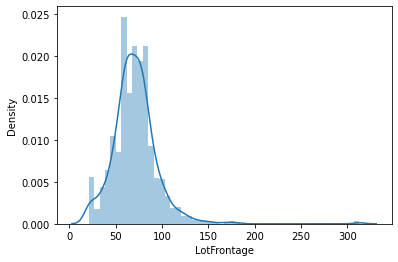

Standard Deviation : 24.497654520102927


In [1729]:
# distribution of column 'lotFrontage' before imputing with mean value 
sns.distplot(house_df['LotFrontage'])
plt.show()

print("Standard Deviation :",np.std(house_df['LotFrontage']))

In [1730]:
# impute with mean value
house_df.loc[house_df['LotFrontage'].isnull(),'LotFrontage'] = house_df['LotFrontage'].mean()
house_df['LotFrontage'].isnull().sum()

0

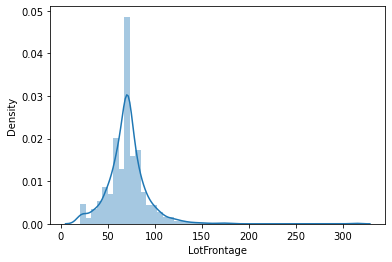

Standard deviation after imputing : 22.151600478388346


In [1731]:
# distribution of column 'lotFrontage' after imputing with mean value 
sns.distplot(house_df['LotFrontage'])
plt.show()
print("Standard deviation after imputing :", np.std(house_df['LotFrontage']))

Observation:
- The distribution of data is not affected much after imputation.

#### Date to age conversion

In [1732]:
# columns having date value
house_df[["YrSold","MoSold","GarageYrBlt","YearRemodAdd","YearBuilt"]].head()

,YrSold,MoSold,GarageYrBlt,YearRemodAdd,YearBuilt
0,2008,2,2003.0,2003,2003
1,2007,5,1976.0,1976,1976
2,2008,9,2001.0,2002,2001
3,2006,2,1998.0,1970,1915
4,2008,12,2000.0,2000,2000


- create new column 'age' to represent how old the house is. 
- And then drop all the columns related to date <br>


In [1733]:
# add 'age' column
from datetime import date 
house_df['age'] = date.today().year - house_df['YearBuilt']

# drop all dates column
house_df.drop(["YrSold","MoSold","GarageYrBlt","YearRemodAdd","YearBuilt"],axis = 1, inplace = True)

#inspect
house_df['age'].head()



0     17
1     44
2     19
3    105
4     20
Name: age, dtype: int64

#### Inspecting dataframe after data cleaning

In [1734]:

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  RoofStyle      1338 non-null   object 
 18  RoofMatl

In [1735]:
# loss percent
print("percentage of data left after datacleaning :", round(100*len(house_df)/initial_rows,2))

percentage of data left after datacleaning : 91.64


### Step 3 EDA

Separate Numerical and categorical columns for analysis



In [1736]:
# separate categorical and numerical
df_cat = house_df.select_dtypes(include=['object'])
df_num = house_df.select_dtypes(include=['int64','float64'])

#### Treating numerical columns one by one.

##### Outlier Treatement

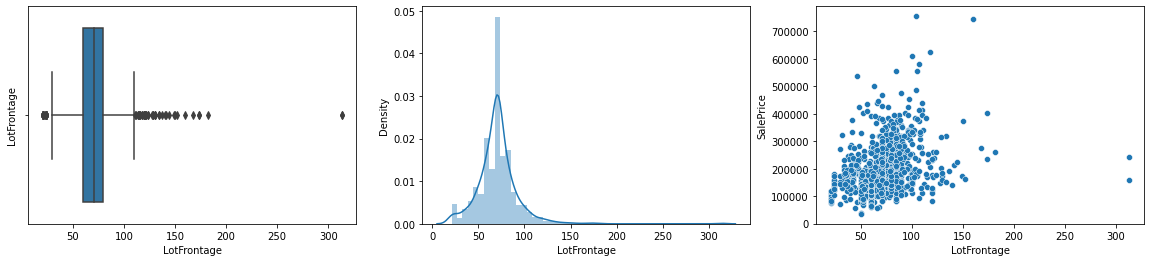

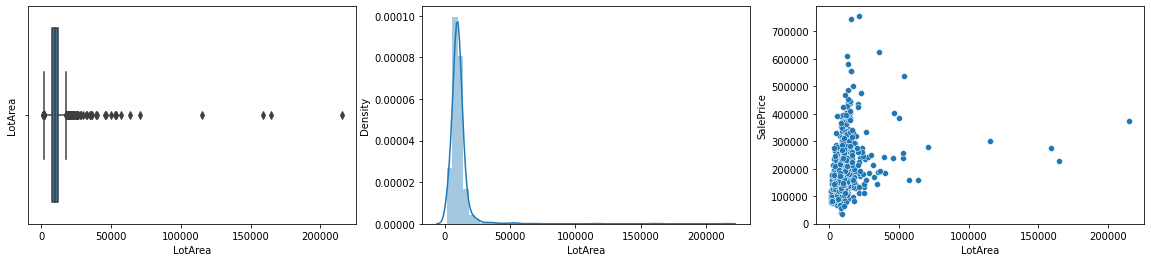

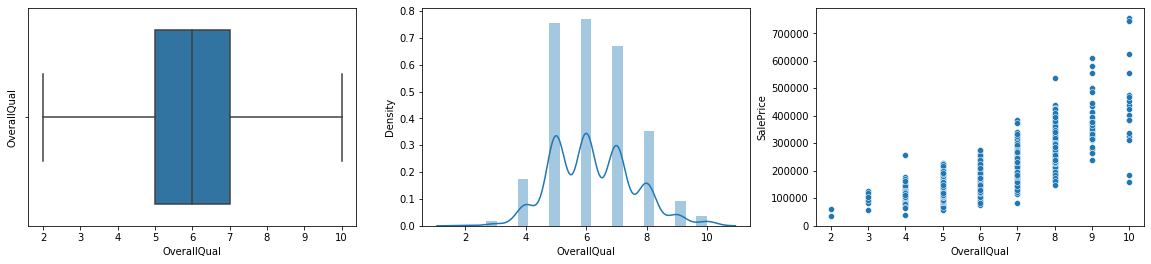

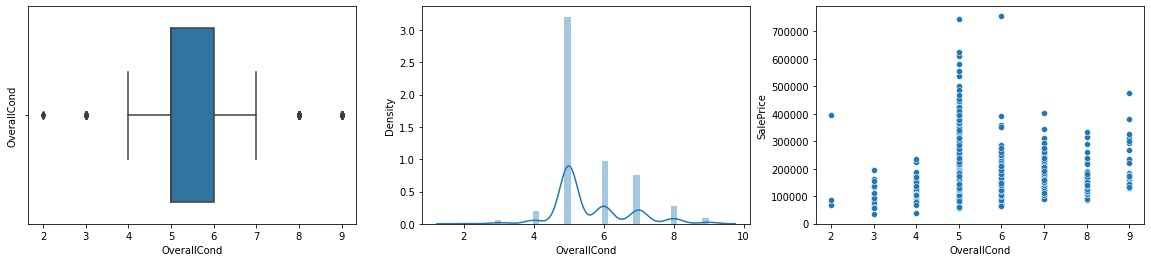

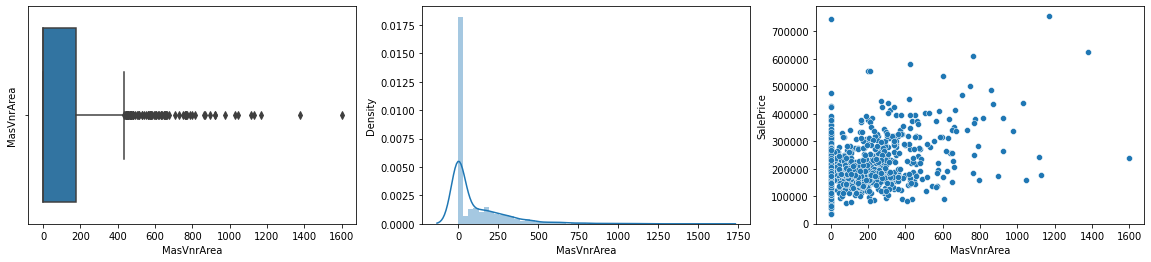

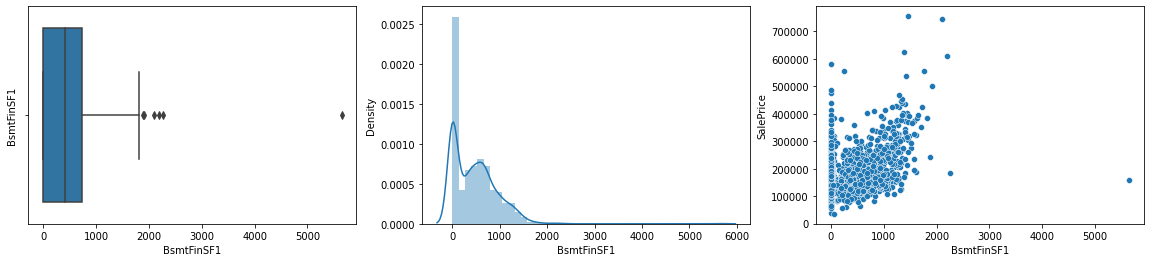

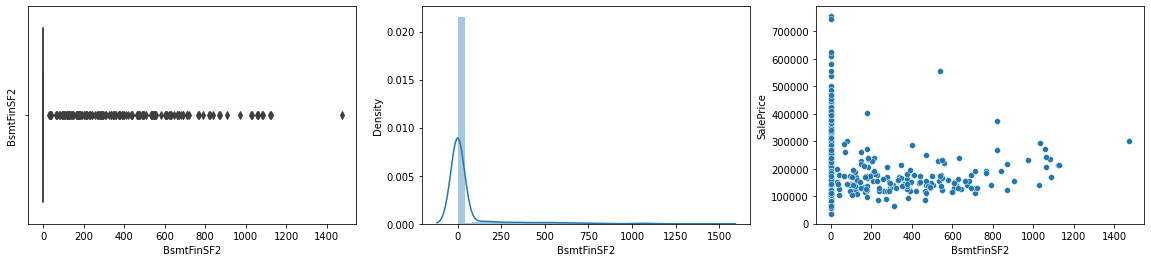

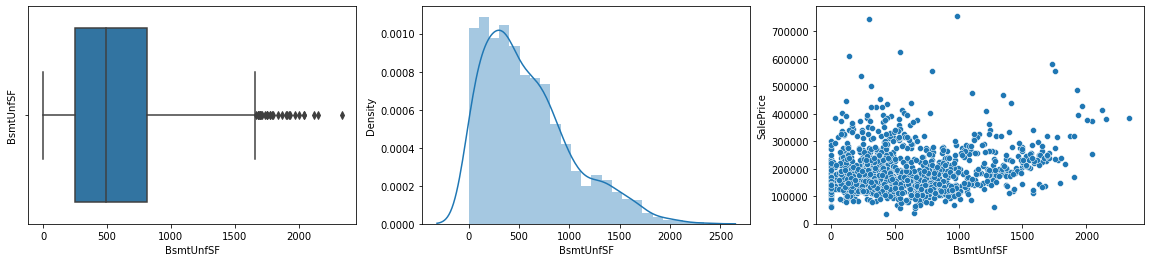

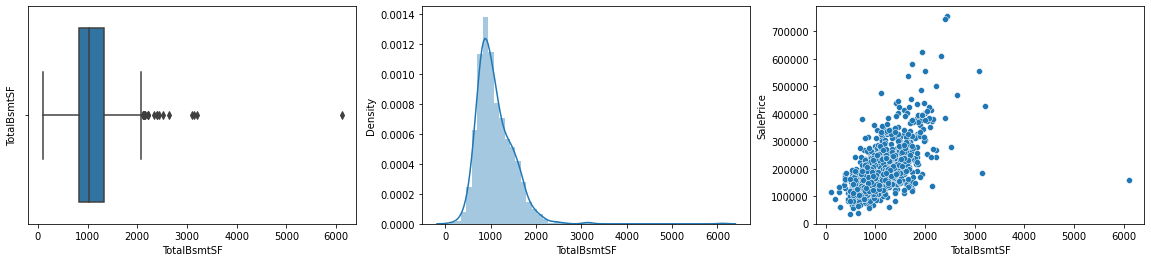

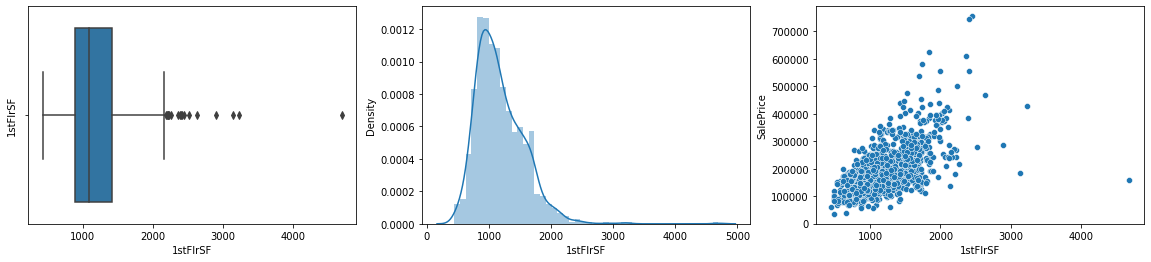

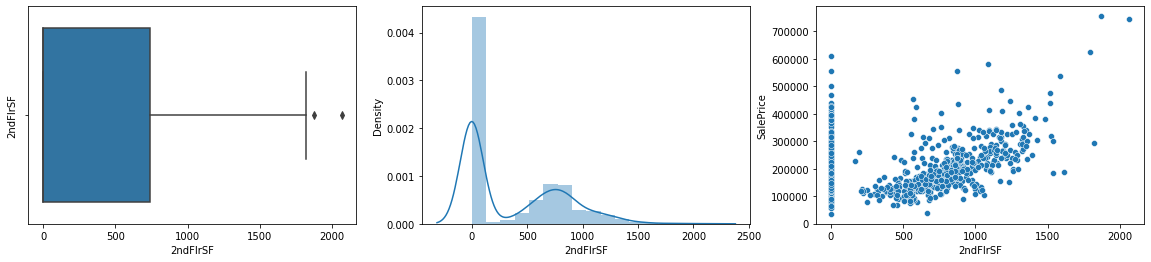

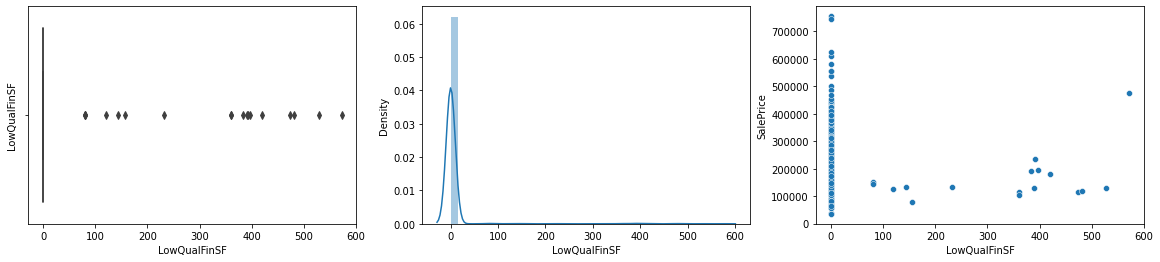

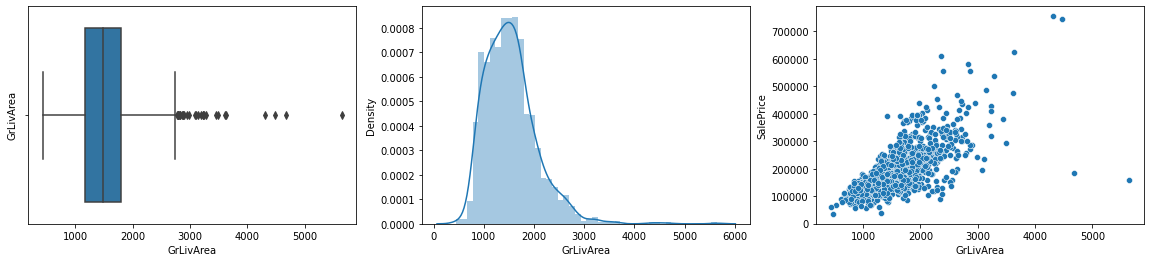

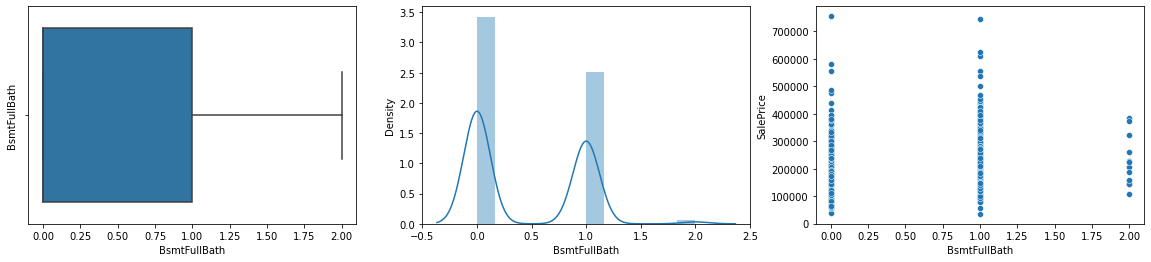

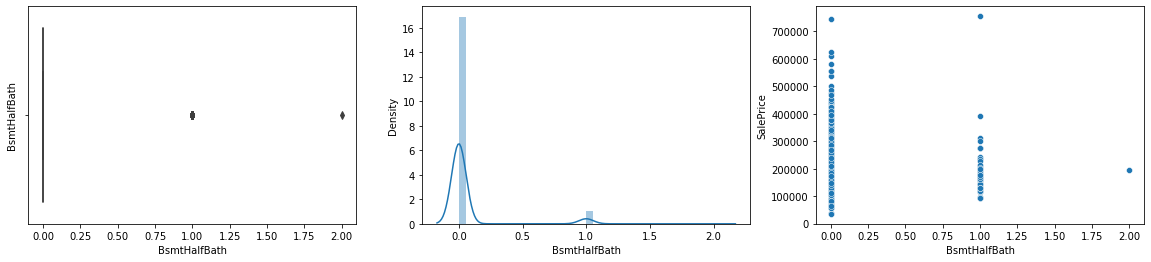

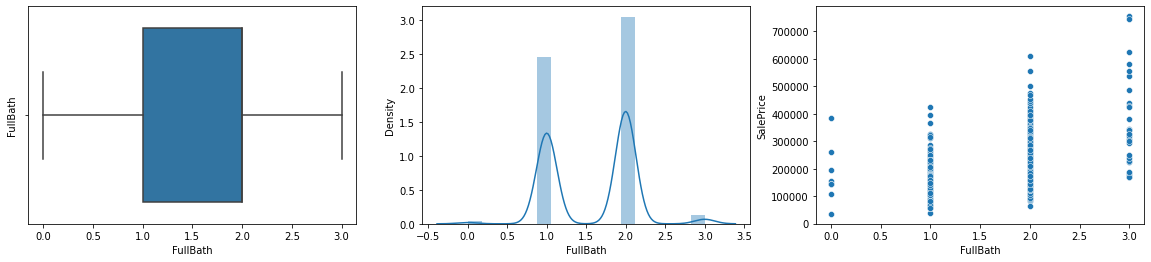

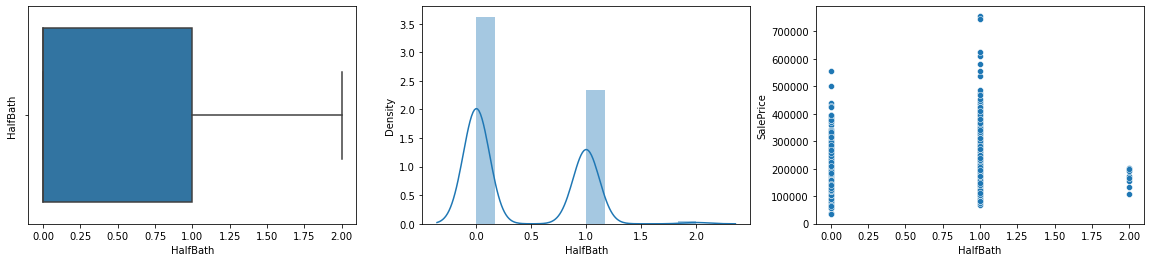

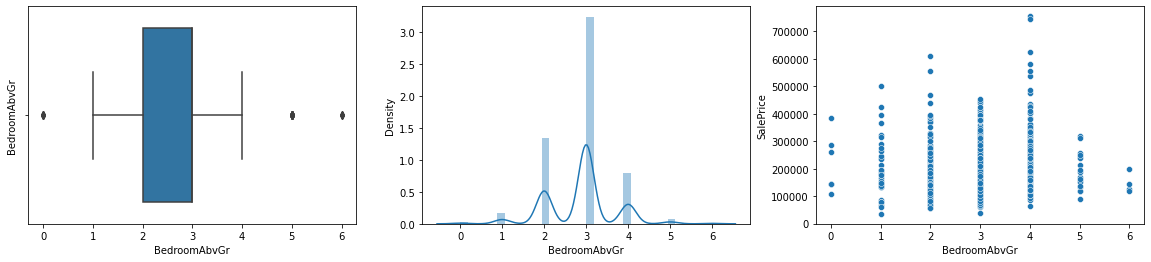

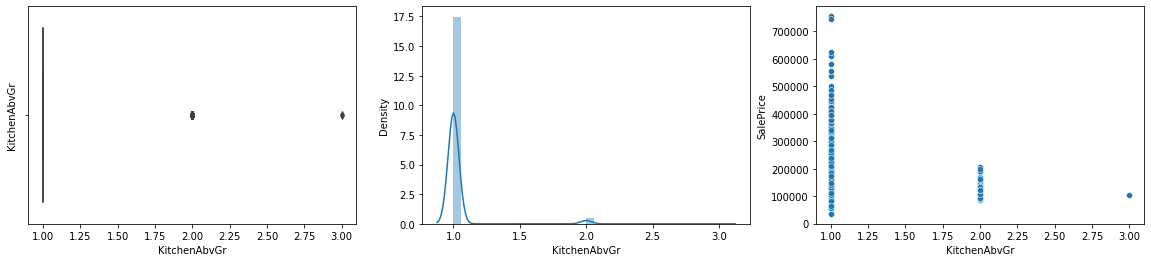

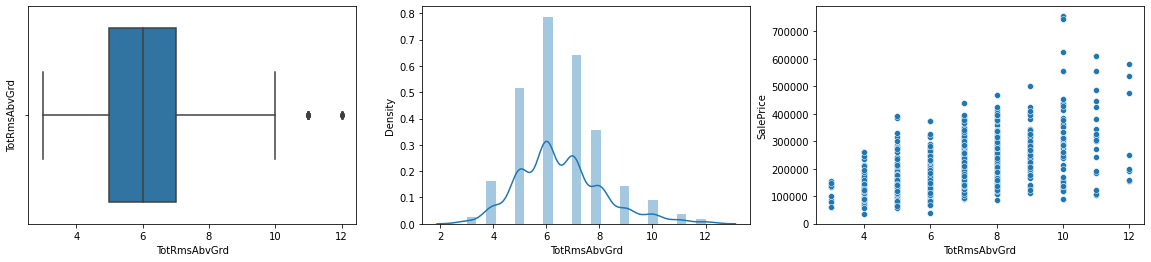

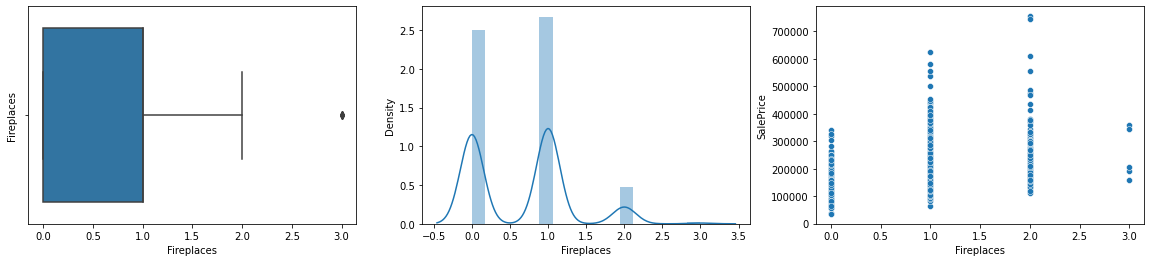

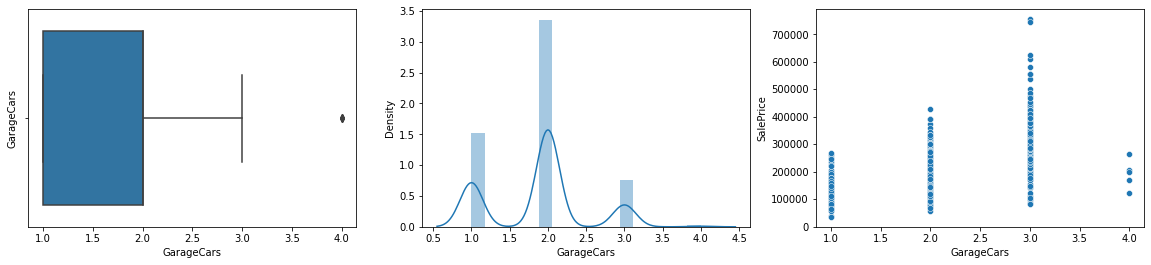

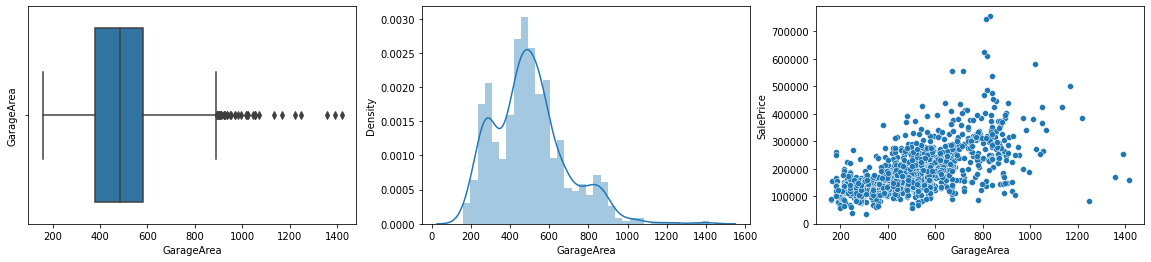

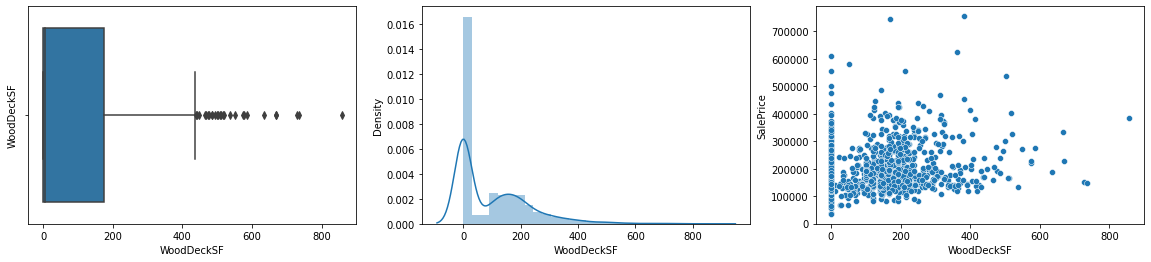

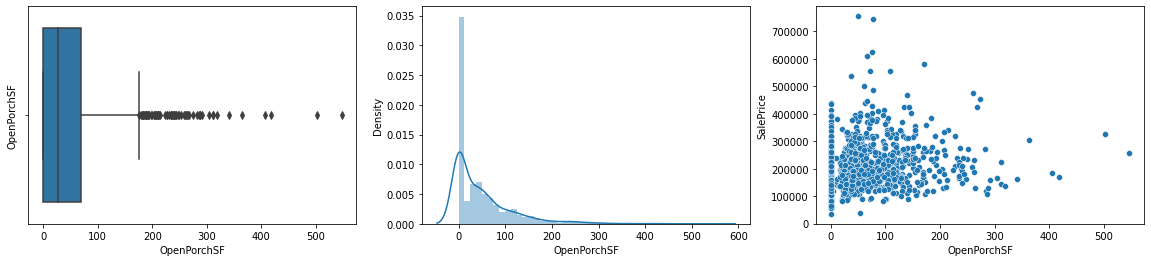

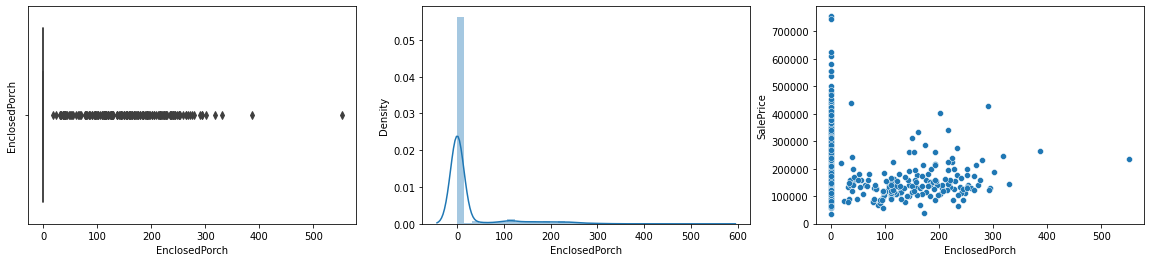

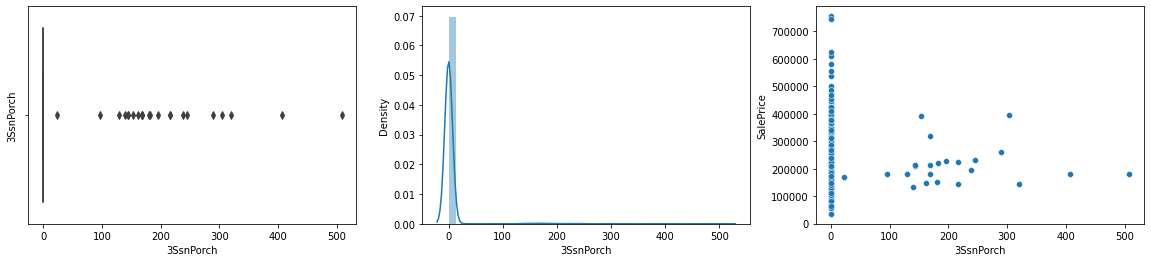

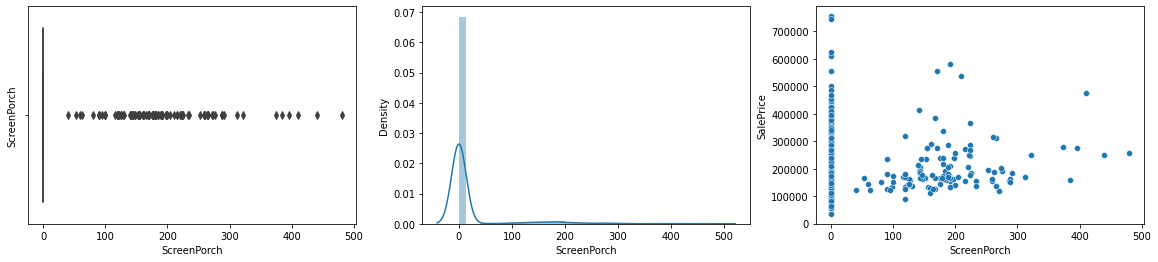

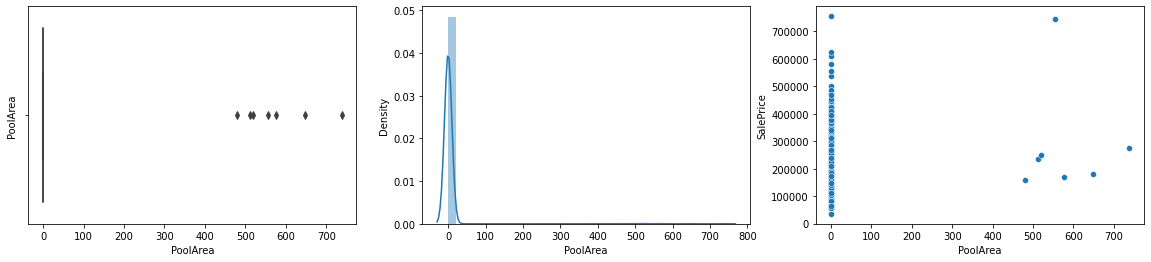

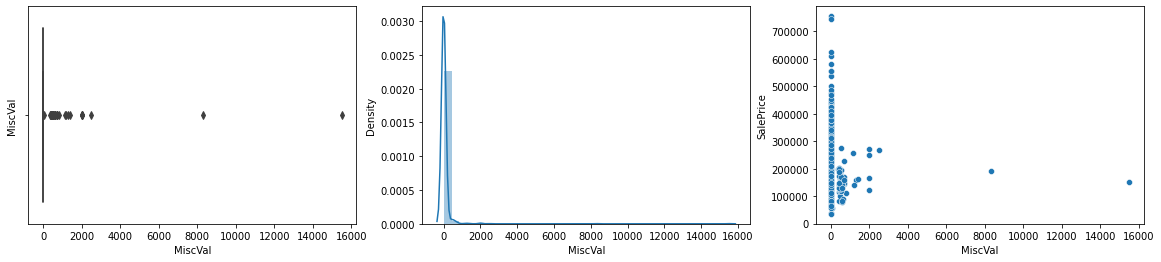

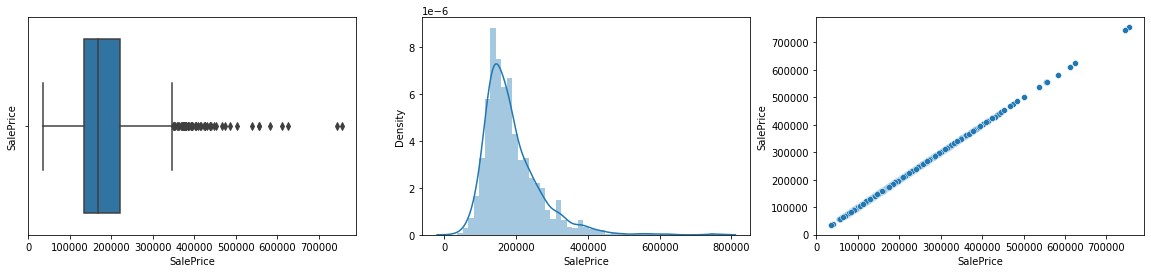

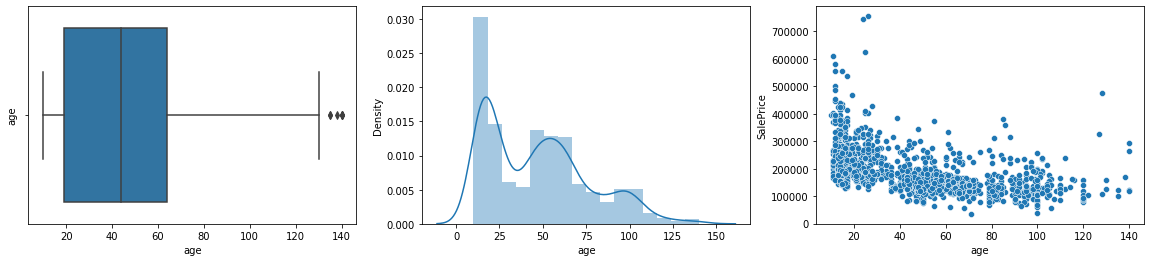

In [1737]:
#Check Outliers
for col in df_num.columns[1:]:
  plt.figure(figsize = [20,4])
  plt.subplot(131)
  plt.ylabel(col)
  sns.boxplot(house_df[col])
  plt.subplot(132)
  sns.distplot(house_df[col])
  plt.subplot(133)
  sns.scatterplot(data = house_df, y = 'SalePrice',x= col)
  plt.show()

Observation:
- Some columns are highly skewewd , more than 95% value is of same value.
- These columns are LowQualFinSF, BsmtHalfBath, KitchenAbvGr, PoolArea','MiscVal','3SsnPorch.
- These columns will be dropped.

##### dropping Highly skewed columns

In [1738]:
house_df.drop(['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr','PoolArea','MiscVal','3SsnPorch','ScreenPorch','EnclosedPorch'],axis = 1, inplace = True)
df_num.drop(['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr','PoolArea','MiscVal','3SsnPorch','ScreenPorch','EnclosedPorch'],axis = 1, inplace = True)

In [1739]:
# define a function to plot three graphs:  boxplot, distribution and scatter plot with target variable,
# to analyse and handle the column.
def threegraph(col_name):
  plt.figure(figsize = [20,4])
  plt.subplot(131)
  plt.ylabel(col_name)
  sns.boxplot(house_df[col_name])
  plt.subplot(132)
  sns.distplot(house_df[col_name])
  plt.subplot(133)
  sns.scatterplot(data = house_df, y = 'SalePrice',x= col_name)
  plt.show()

##### LotFrontage


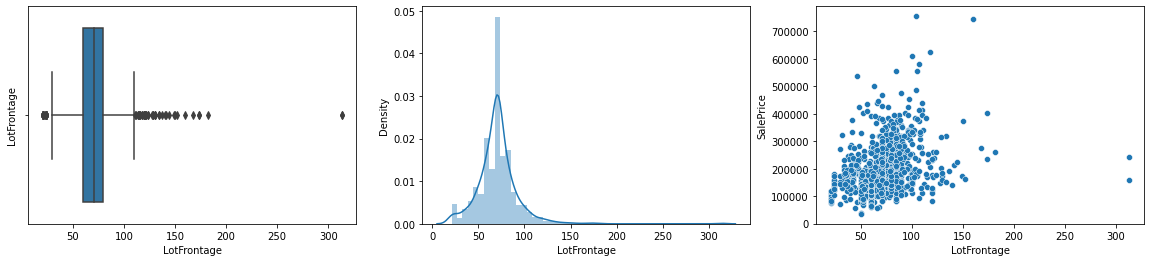

In [1740]:
threegraph('LotFrontage')

Observation:
- data is almost normally distributed with few outliers.
- capping the outliers

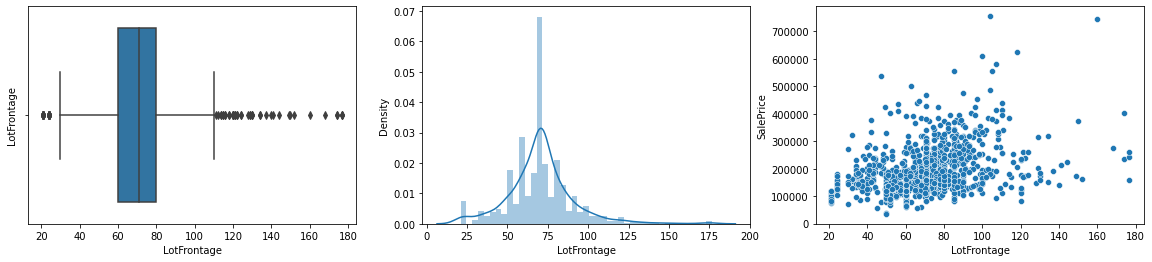

In [1741]:
# capping
house_df.loc[house_df['LotFrontage'] >= house_df['LotFrontage'].quantile(0.998),'LotFrontage'] = house_df['LotFrontage'].quantile(0.998) 


#graph after capping
threegraph('LotFrontage')


##### LotArea
- Outlier Treatement by capping

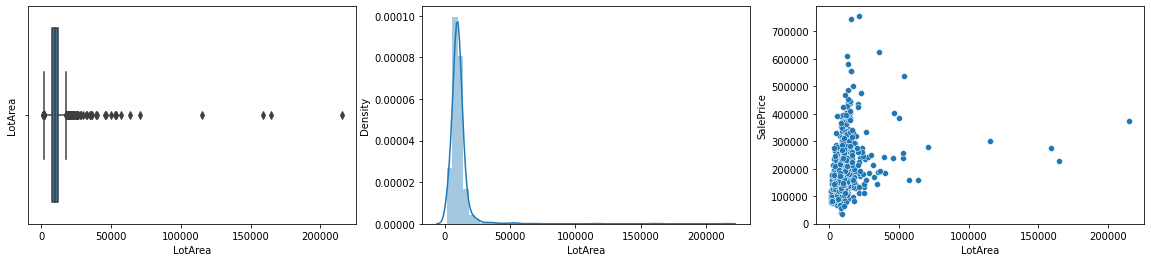

In [1742]:
#plotting before capping
threegraph('LotArea')

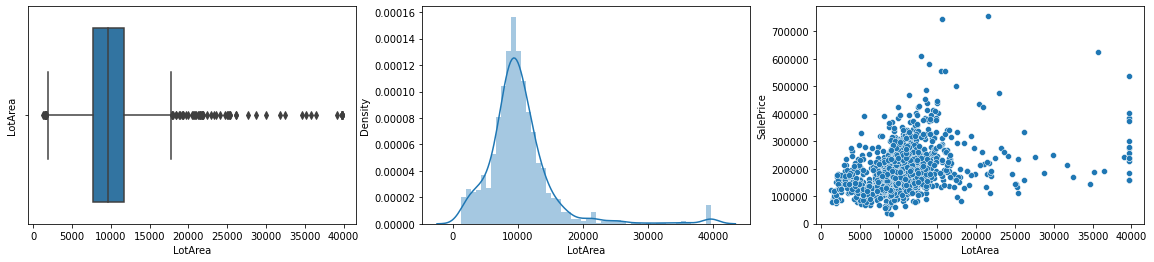

In [1743]:
# capping
house_df.loc[house_df['LotArea'] >= house_df['LotArea'].quantile(0.99),'LotArea'] = house_df['LotArea'].quantile(0.99) 
threegraph('LotArea')

##### BsmtFinSF1


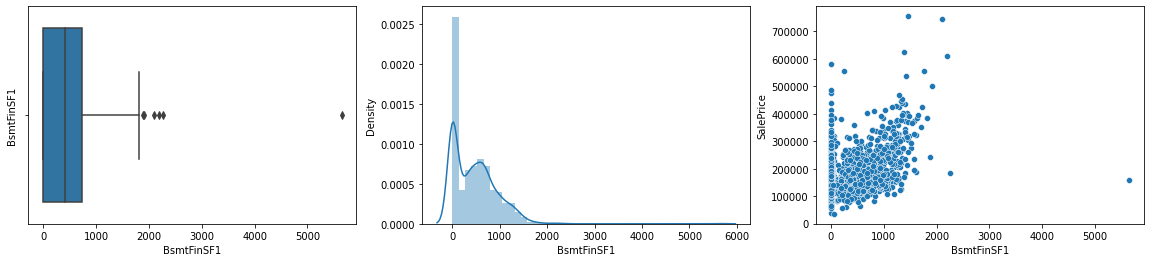

In [1744]:
#ploting graph
threegraph('BsmtFinSF1')

Observation:
- There is one value which is extremly high
- It is also found to be outlier in other columns also.
- dropping the row.

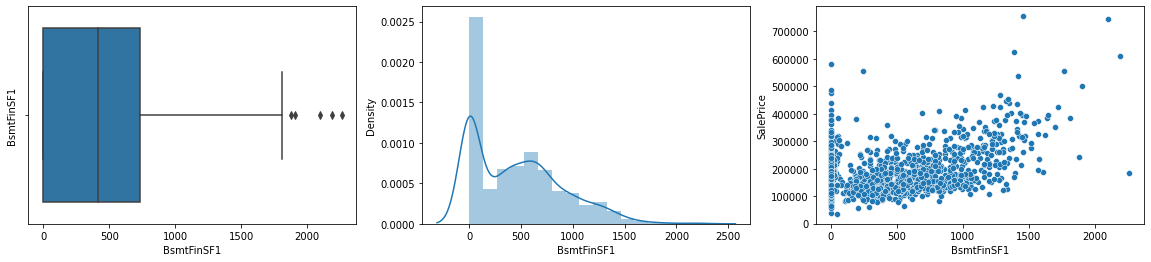

In [1745]:
# dropping
#house_df.loc[house_df['BsmtFinSF1'] >= house_df['BsmtFinSF1'].quantile(0.999),'BsmtFinSF1'] = house_df['BsmtFinSF1'].quantile(0.999) 
indexx = house_df[house_df['BsmtFinSF1'] == house_df['BsmtFinSF1'].quantile(1)].index
house_df.drop(indexx,inplace= True)

threegraph('BsmtFinSF1')

##### BsmtFinSF2


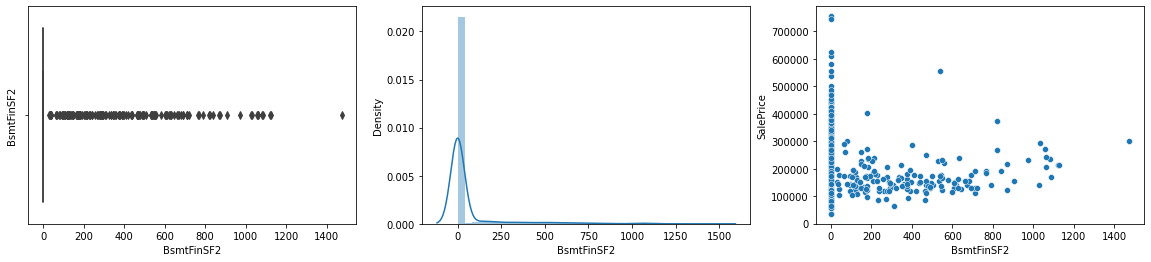

In [1746]:
# plot graph
threegraph('BsmtFinSF2')



Observation:
- Skewed column with 87% value as 0. 
- Dropping the column.


In [1747]:
# dropping the column 
house_df.drop('BsmtFinSF2',axis = 1, inplace = True)
df_num.drop('BsmtFinSF2',axis = 1, inplace = True)

##### Age

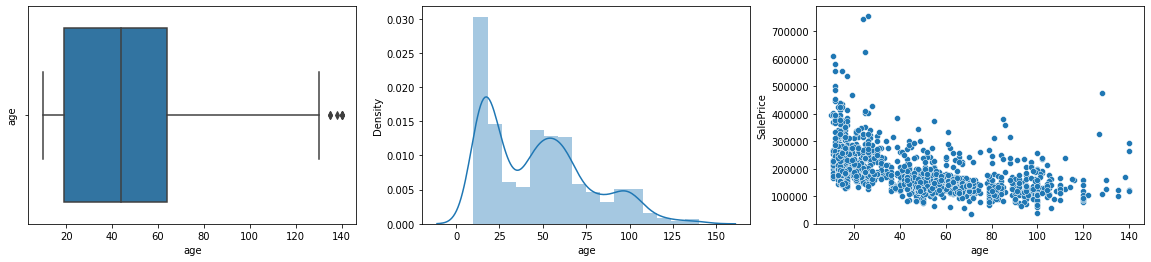

In [1748]:
threegraph('age')

Observation;
- It shows inverse relation with Sales Price.
- Age is right skewed.


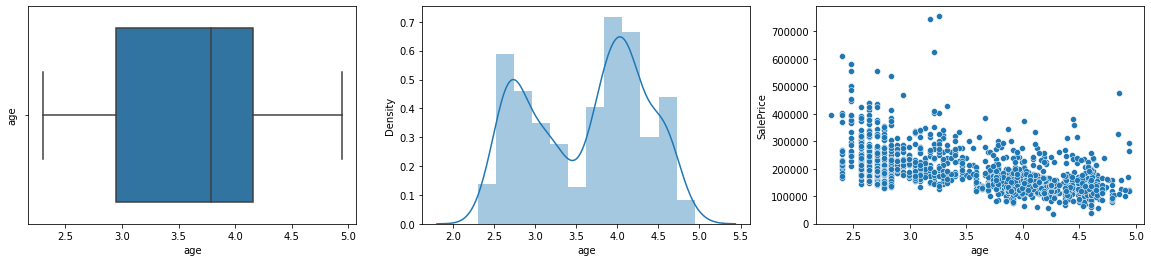

In [1749]:
# using log transformation

house_df['age'] = np.log(house_df['age'])
plt.figure(figsize = [20,4])
plt.subplot(131)
plt.ylabel('age')
sns.boxplot(house_df['age'])
plt.subplot(132)
sns.distplot(house_df['age'])
plt.subplot(133)
sns.scatterplot(data = house_df, y = 'SalePrice',x= 'age')
plt.show()

##### Pairplot

In [1750]:
sns.pairplot(house_df[df_num.columns])

##### HeatMap

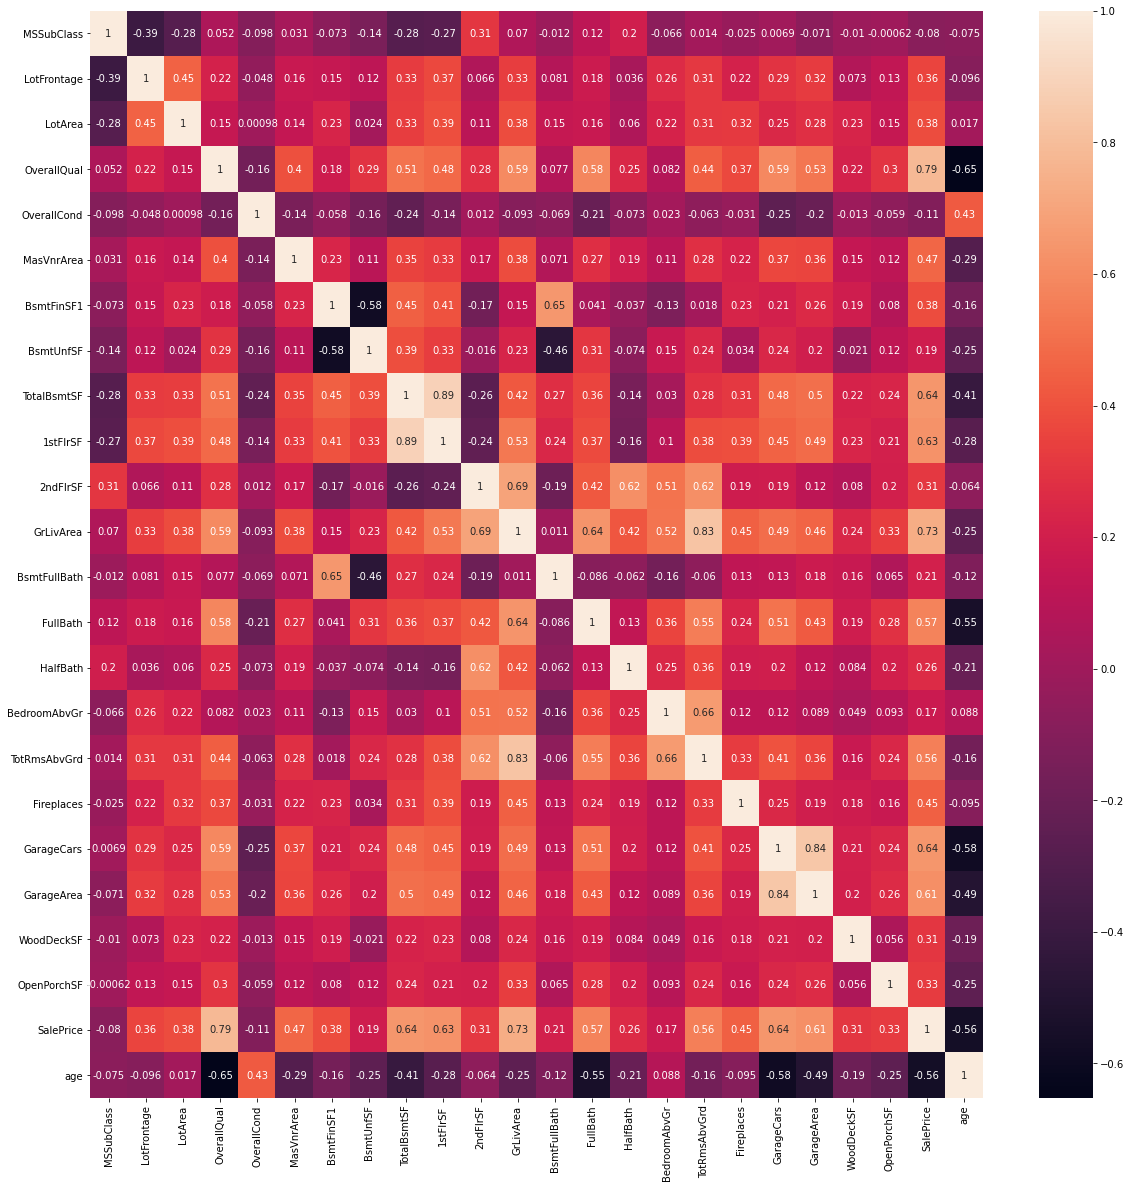

In [1751]:
plt.figure(figsize=[20,20])
sns.heatmap(house_df[df_num.columns].corr(),annot = True)
plt.show()

Observation:
- Very High correlation between __1stFlrSF__ and __TotalBsmtSF__ is about 89%.
- Lets drop __TotalBsmtSF__

In [1752]:
house_df.drop('TotalBsmtSF', axis= 1, inplace = True)

#### EDA on categorical columns

##### Inspecting categorical column by 
- barplot
- boxplot
- value_counts(normalize)

1 . MSZoning
-------------------------
RL         79.655946
RM         14.285714
FV          4.637248
RH          0.822737
C (all)     0.598355
Name: MSZoning, dtype: float64


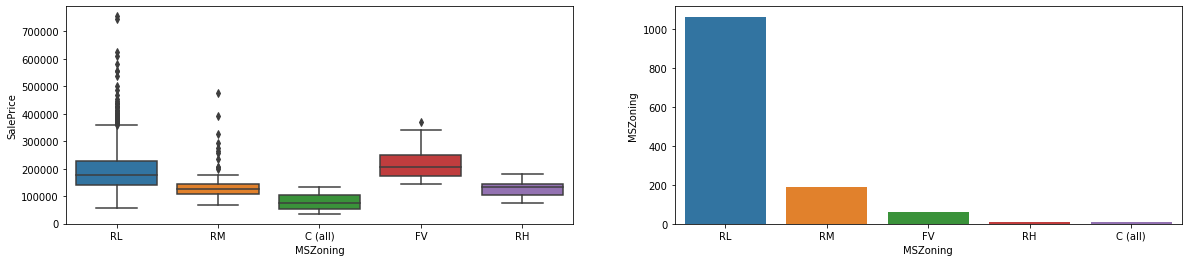

*************************
2 . Street
-------------------------
Pave    99.626028
Grvl     0.373972
Name: Street, dtype: float64


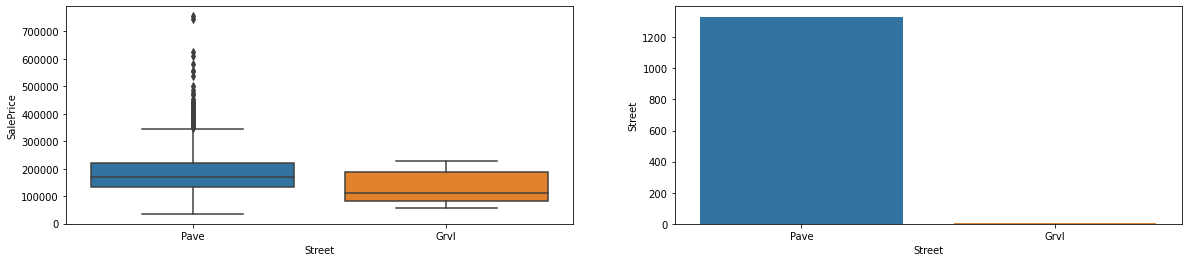

*************************
3 . LotShape
-------------------------
Reg    62.004488
IR1    34.330591
IR2     2.991773
IR3     0.673149
Name: LotShape, dtype: float64


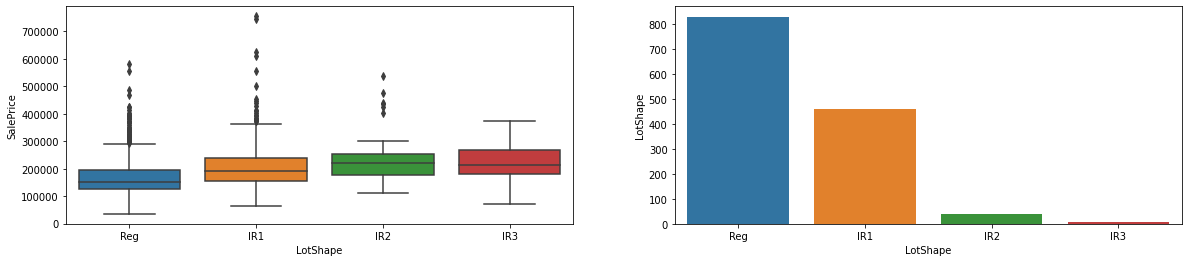

*************************
4 . LandContour
-------------------------
Lvl    90.201945
Bnk     3.814510
HLS     3.590127
Low     2.393418
Name: LandContour, dtype: float64


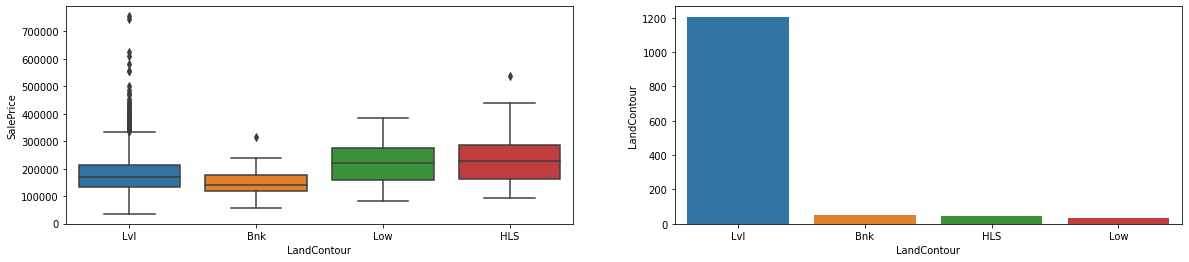

*************************
5 . Utilities
-------------------------
AllPub    99.925206
NoSeWa     0.074794
Name: Utilities, dtype: float64


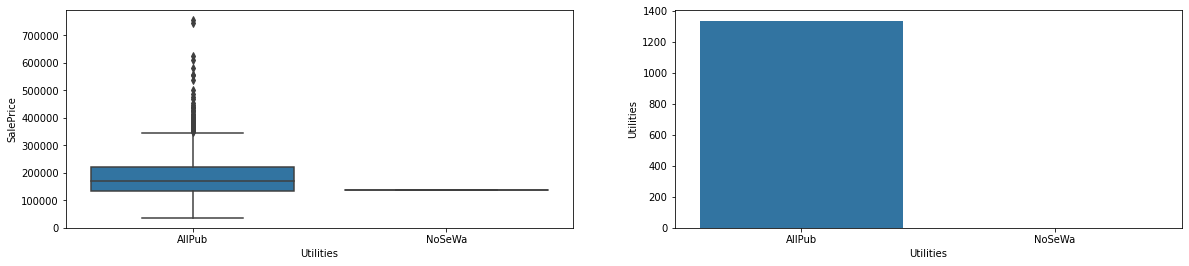

*************************
6 . LotConfig
-------------------------
Inside     71.578160
Corner     18.175019
CulDSac     6.731488
FR2         3.216156
FR3         0.299177
Name: LotConfig, dtype: float64


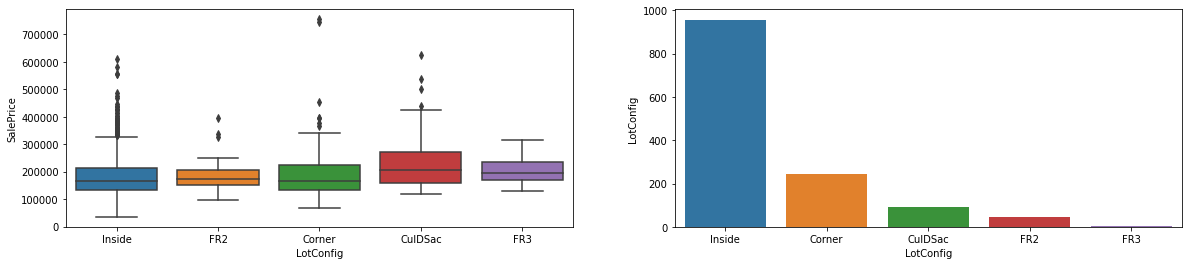

*************************
7 . LandSlope
-------------------------
Gtl    94.540015
Mod     4.562453
Sev     0.897532
Name: LandSlope, dtype: float64


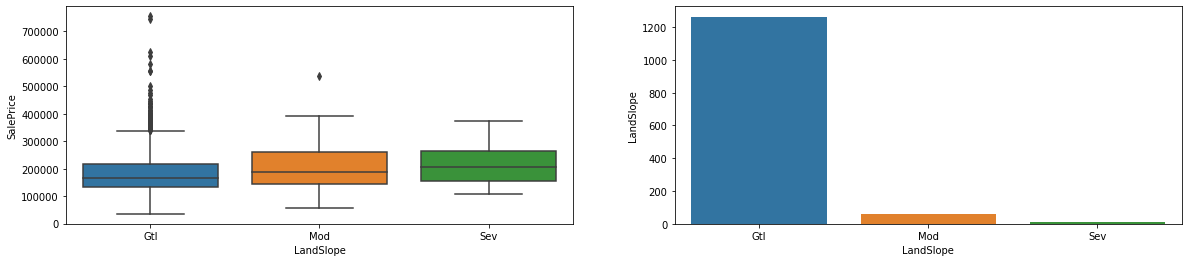

*************************
8 . Neighborhood
-------------------------
NAmes      15.632012
CollgCr    10.919970
OldTown     7.479432
Somerst     6.207928
Gilbert     5.759162
NridgHt     5.609574
NWAmes      5.459985
Edwards     5.160808
Sawyer      5.160808
SawyerW     3.964099
Crawfor     3.739716
BrkSide     3.515333
Mitchel     3.141361
NoRidge     3.066567
Timber      2.767390
IDOTRR      2.169035
ClearCr     1.944652
StoneBr     1.869858
SWISU       1.495886
Blmngtn     1.271503
BrDale      1.121915
MeadowV     0.897532
Veenker     0.822737
NPkVill     0.673149
Blueste     0.149589
Name: Neighborhood, dtype: float64


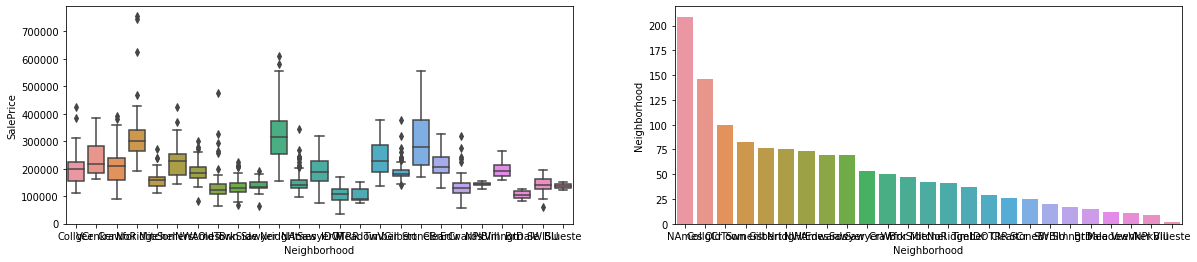

*************************
9 . Condition1
-------------------------
Norm      86.910995
Feedr      4.637248
Artery     3.216156
RRAn       1.944652
PosN       1.421092
RRAe       0.747943
PosA       0.598355
RRNn       0.373972
RRNe       0.149589
Name: Condition1, dtype: float64


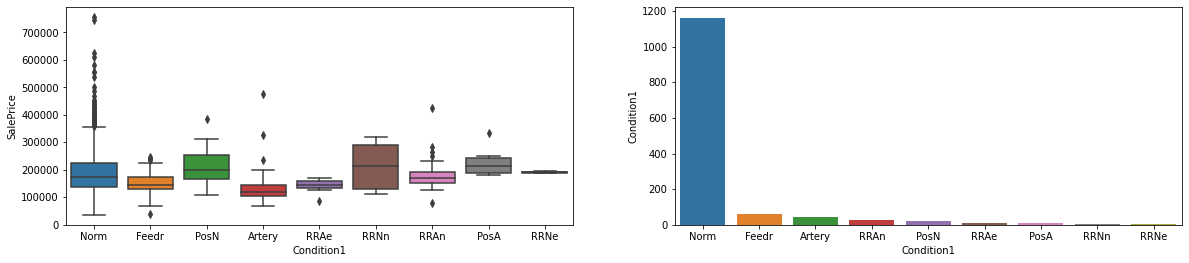

*************************
10 . Condition2
-------------------------
Norm      98.952880
Feedr      0.373972
Artery     0.149589
RRNn       0.149589
PosN       0.149589
PosA       0.074794
RRAn       0.074794
RRAe       0.074794
Name: Condition2, dtype: float64


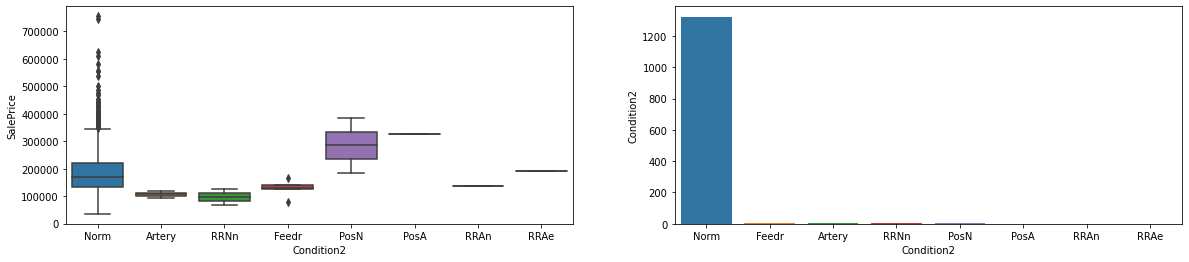

*************************
11 . BldgType
-------------------------
1Fam      85.041137
TwnhsE     8.376963
Twnhs      2.842184
Duplex     2.094241
2fmCon     1.645475
Name: BldgType, dtype: float64


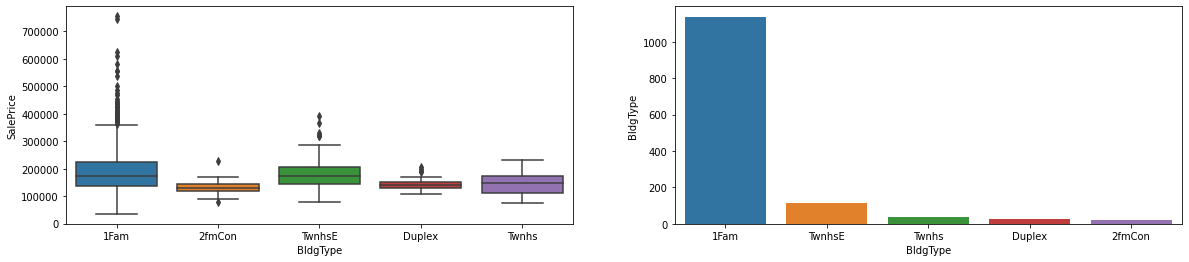

*************************
12 . HouseStyle
-------------------------
1Story    49.139865
2Story    31.787584
1.5Fin    10.022438
SLvl       4.786836
SFoyer     2.243829
1.5Unf     0.822737
2.5Unf     0.747943
2.5Fin     0.448766
Name: HouseStyle, dtype: float64


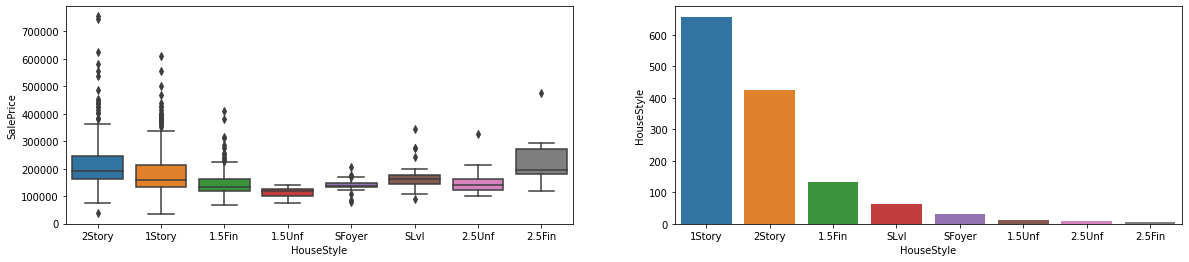

*************************
13 . RoofStyle
-------------------------
Gable      77.561705
Hip        20.269260
Flat        0.822737
Gambrel     0.747943
Mansard     0.448766
Shed        0.149589
Name: RoofStyle, dtype: float64


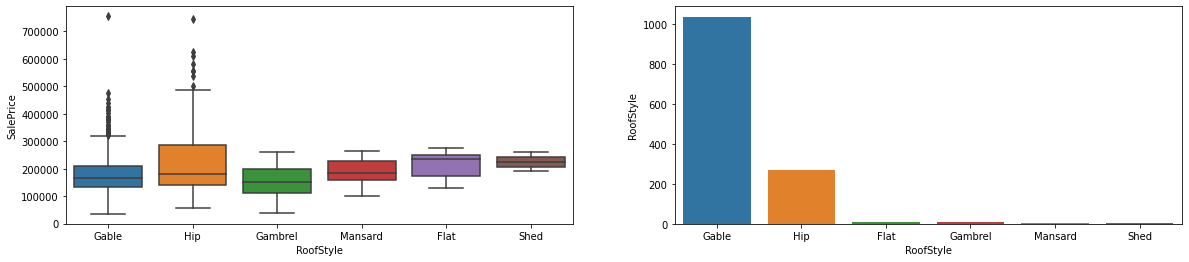

*************************
14 . RoofMatl
-------------------------
CompShg    98.279731
Tar&Grv     0.673149
WdShngl     0.448766
WdShake     0.373972
Membran     0.074794
Roll        0.074794
Metal       0.074794
Name: RoofMatl, dtype: float64


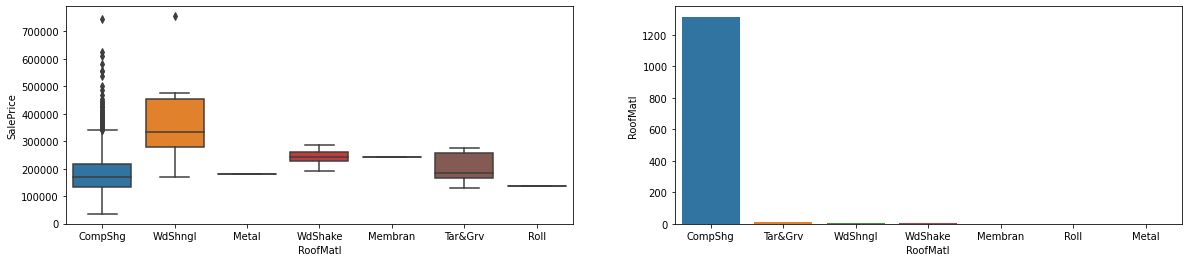

*************************
15 . Exterior1st
-------------------------
VinylSd    36.350037
HdBoard    15.781601
MetalSd    15.033657
Wd Sdng    13.687360
Plywood     7.479432
CemntBd     3.889304
BrkFace     3.290950
WdShing     1.495886
Stucco      1.495886
AsbShng     1.121915
Stone       0.149589
CBlock      0.074794
BrkComm     0.074794
ImStucc     0.074794
Name: Exterior1st, dtype: float64


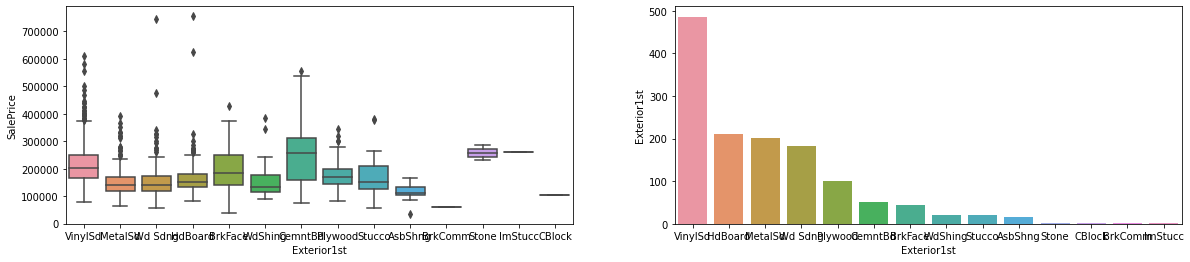

*************************
16 . Exterior2nd
-------------------------
VinylSd    35.527300
MetalSd    14.734480
HdBoard    14.734480
Wd Sdng    13.163800
Plywood     9.498878
CmentBd     3.814510
Wd Shng     2.393418
BrkFace     1.645475
Stucco      1.645475
AsbShng     1.196709
ImStucc     0.747943
Brk Cmn     0.448766
AsphShn     0.149589
Stone       0.149589
CBlock      0.074794
Other       0.074794
Name: Exterior2nd, dtype: float64


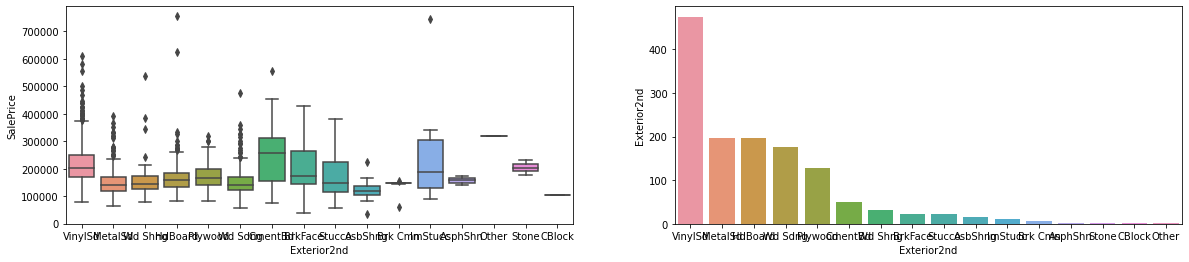

*************************
17 . MasVnrType
-------------------------
None       57.068063
BrkFace    32.311144
Stone       9.498878
BrkCmn      1.121915
Name: MasVnrType, dtype: float64


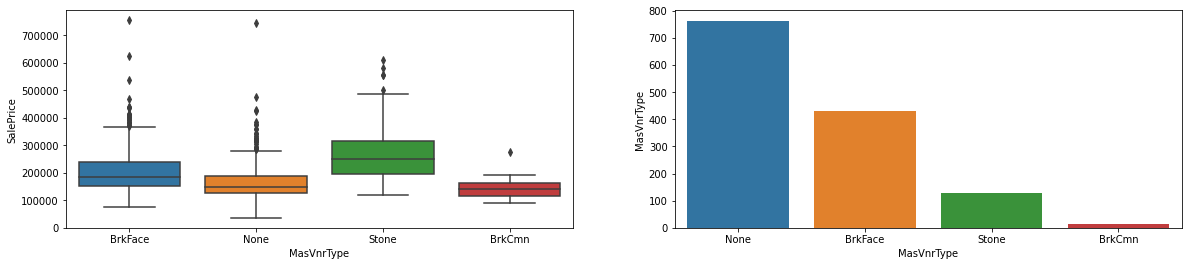

*************************
18 . ExterQual
-------------------------
TA    60.059835
Gd    35.676889
Ex     3.739716
Fa     0.523560
Name: ExterQual, dtype: float64


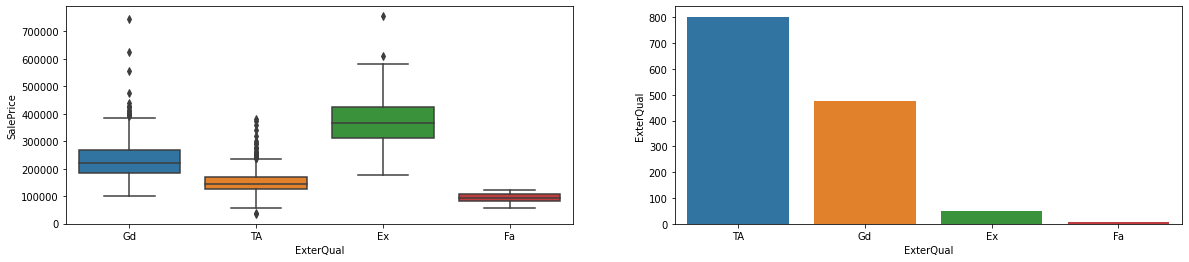

*************************
19 . ExterCond
-------------------------
TA    88.406881
Gd    10.246821
Fa     1.196709
Ex     0.149589
Name: ExterCond, dtype: float64


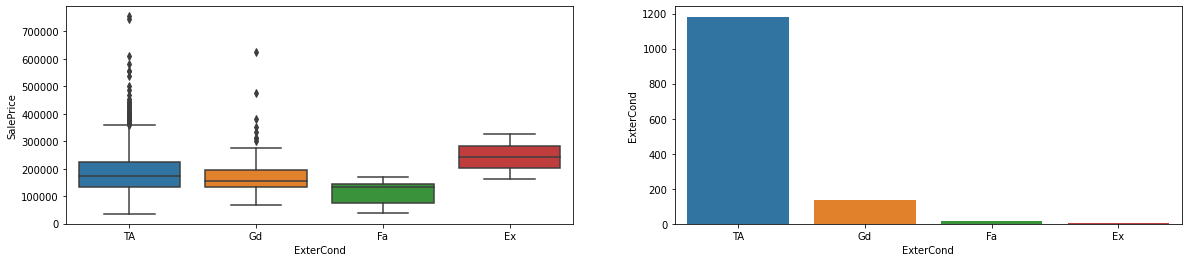

*************************
20 . Foundation
-------------------------
PConc     46.297681
CBlock    43.380703
BrkTil     9.648467
Stone      0.448766
Wood       0.224383
Name: Foundation, dtype: float64


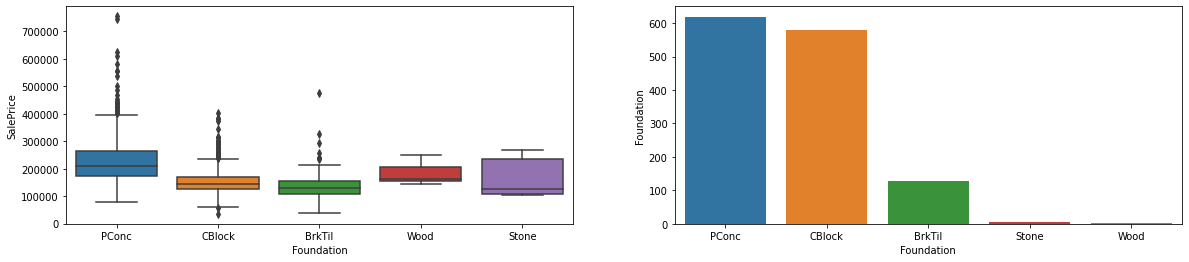

*************************
21 . BsmtQual
-------------------------
TA    44.427823
Gd    44.278235
Ex     8.900524
Fa     2.393418
Name: BsmtQual, dtype: float64


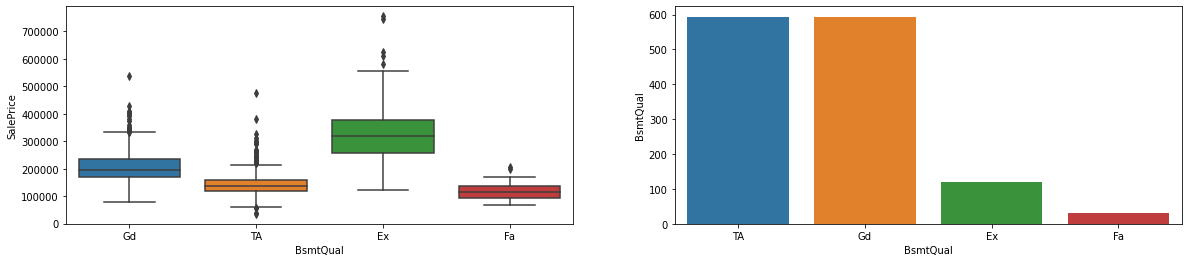

*************************
22 . BsmtCond
-------------------------
TA    92.445774
Gd     4.637248
Fa     2.842184
Po     0.074794
Name: BsmtCond, dtype: float64


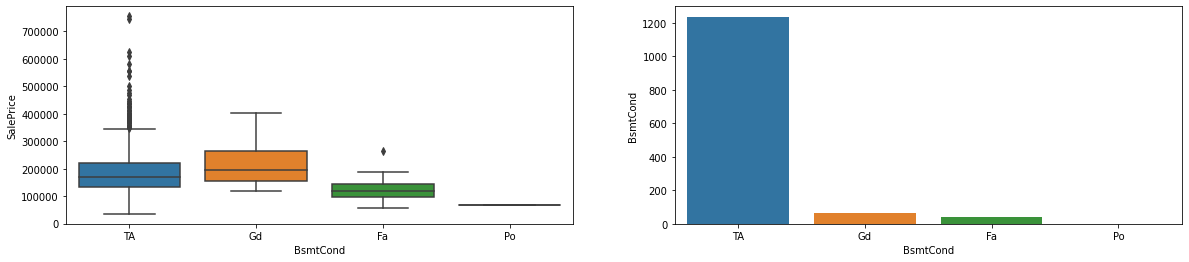

*************************
23 . BsmtExposure
-------------------------
No    66.342558
Av    15.931189
Gd     9.424084
Mn     8.302169
Name: BsmtExposure, dtype: float64


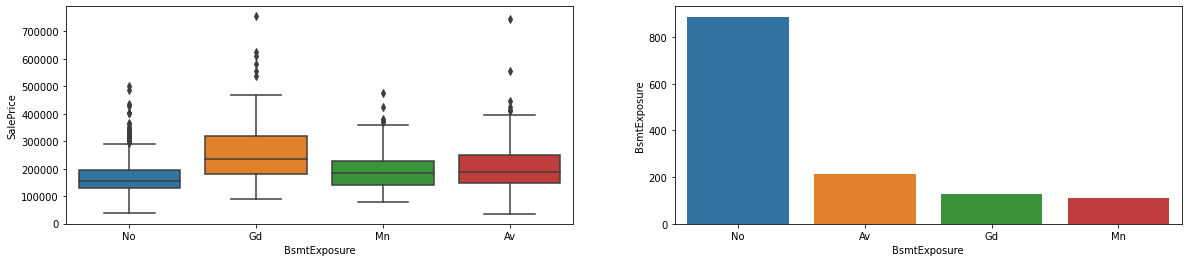

*************************
24 . BsmtFinType1
-------------------------
GLQ    29.992521
Unf    29.319372
ALQ    15.632012
BLQ    10.545999
Rec     9.349289
LwQ     5.160808
Name: BsmtFinType1, dtype: float64


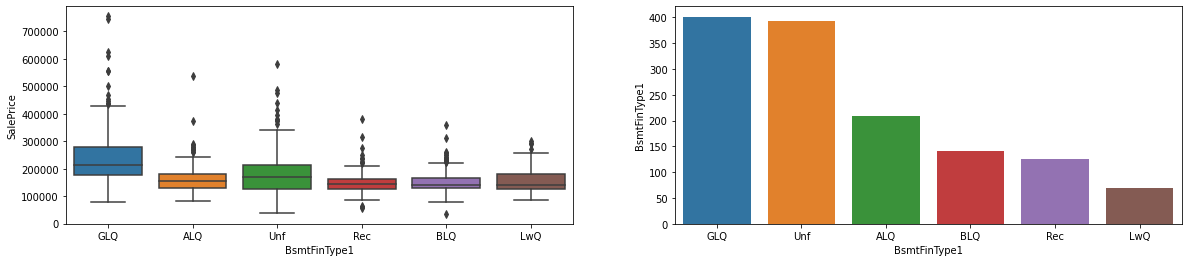

*************************
25 . BsmtFinType2
-------------------------
Unf    87.883321
Rec     3.964099
LwQ     3.440539
BLQ     2.393418
ALQ     1.421092
GLQ     0.897532
Name: BsmtFinType2, dtype: float64


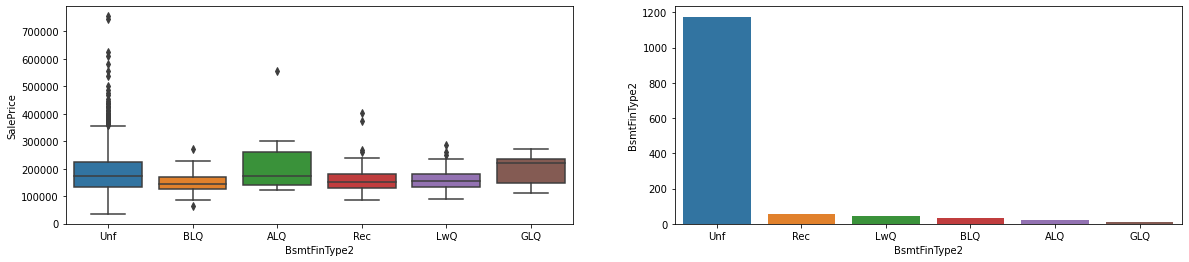

*************************
26 . Heating
-------------------------
GasA    98.504114
GasW     1.196709
Grav     0.224383
OthW     0.074794
Name: Heating, dtype: float64


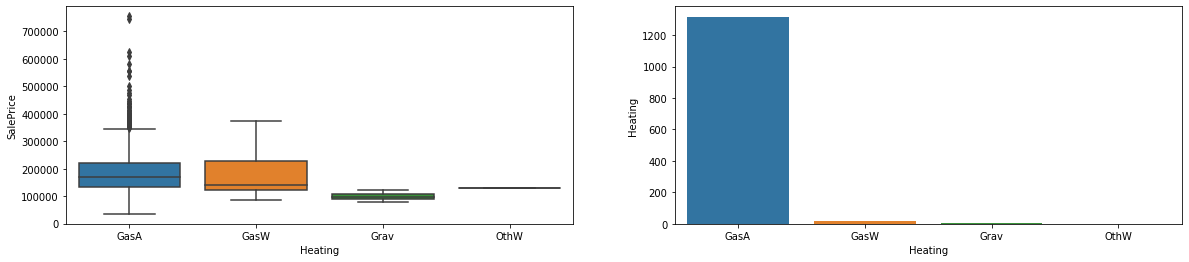

*************************
27 . HeatingQC
-------------------------
Ex    52.580404
TA    28.421840
Gd    16.230366
Fa     2.692595
Po     0.074794
Name: HeatingQC, dtype: float64


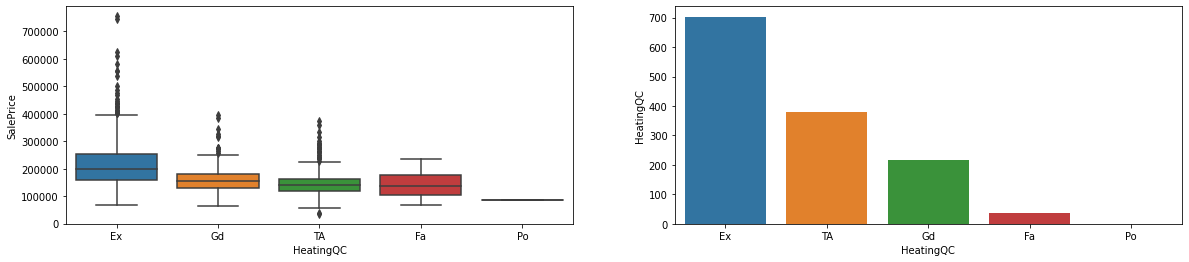

*************************
28 . CentralAir
-------------------------
Y    95.437547
N     4.562453
Name: CentralAir, dtype: float64


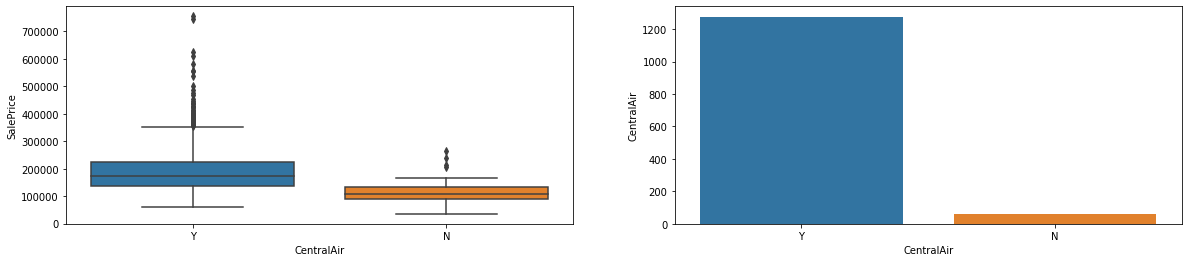

*************************
29 . Electrical
-------------------------
SBrkr    92.819746
FuseA     5.684368
FuseF     1.271503
FuseP     0.149589
Mix       0.074794
Name: Electrical, dtype: float64


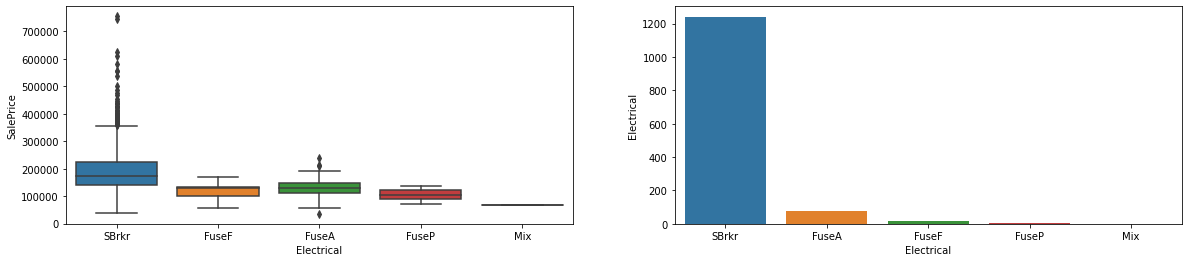

*************************
30 . KitchenQual
-------------------------
TA    48.616305
Gd    42.483171
Ex     7.180254
Fa     1.720269
Name: KitchenQual, dtype: float64


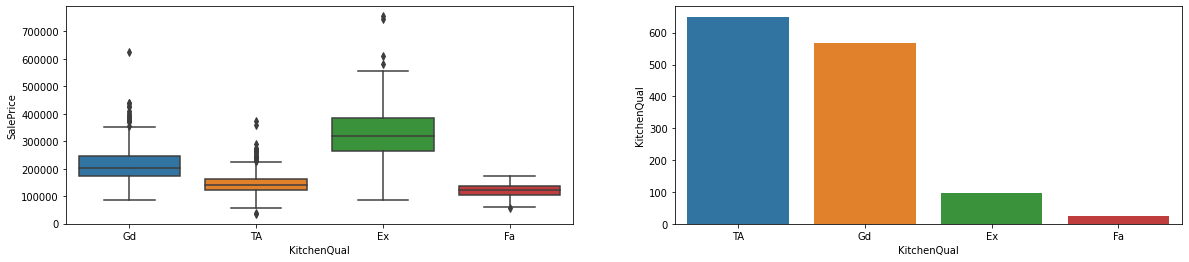

*************************
31 . Functional
-------------------------
Typ     93.717277
Min2     2.243829
Min1     2.094241
Mod      0.822737
Maj1     0.747943
Maj2     0.299177
Sev      0.074794
Name: Functional, dtype: float64


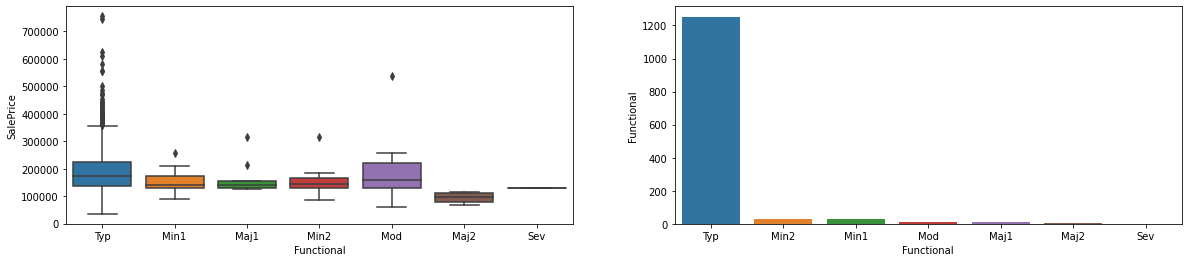

*************************
32 . GarageType
-------------------------
Attchd     63.649963
Detchd     27.599102
BuiltIn     6.357517
Basment     1.421092
CarPort     0.523560
2Types      0.448766
Name: GarageType, dtype: float64


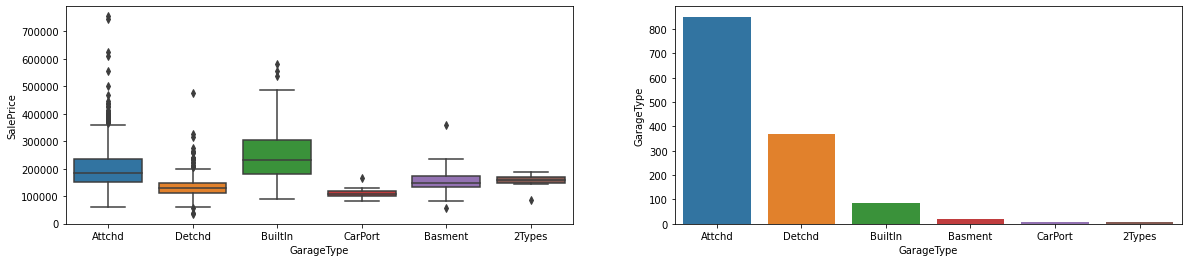

*************************
33 . GarageFinish
-------------------------
Unf    43.380703
RFn    30.890052
Fin    25.729245
Name: GarageFinish, dtype: float64


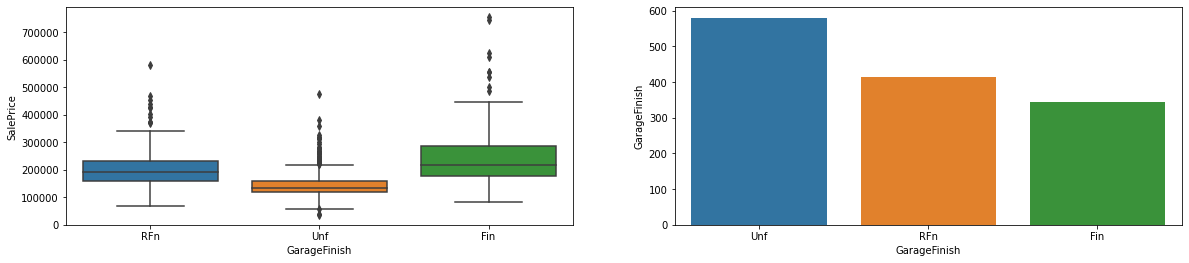

*************************
34 . GarageQual
-------------------------
TA    94.913987
Fa     3.590127
Gd     1.047120
Ex     0.224383
Po     0.224383
Name: GarageQual, dtype: float64


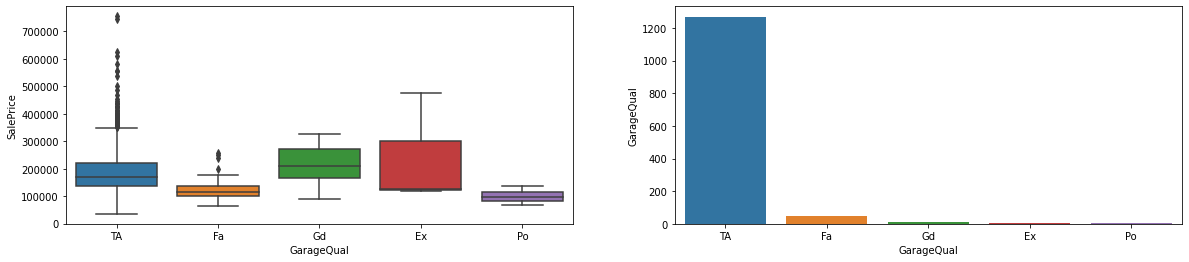

*************************
35 . GarageCond
-------------------------
TA    96.185490
Fa     2.468212
Gd     0.673149
Po     0.523560
Ex     0.149589
Name: GarageCond, dtype: float64


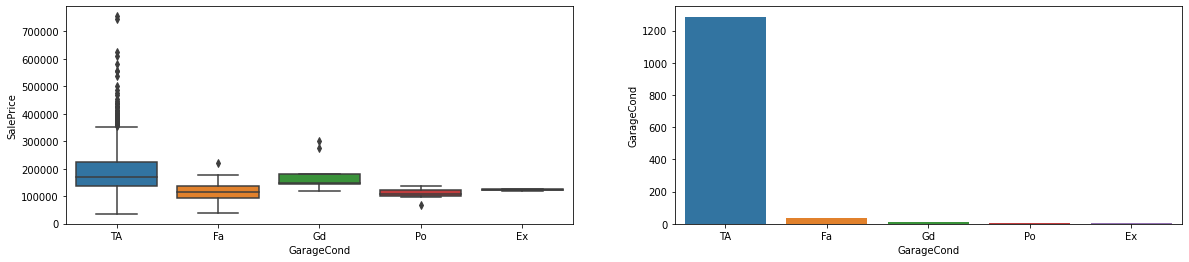

*************************
36 . PavedDrive
-------------------------
Y    93.941660
N     4.038893
P     2.019447
Name: PavedDrive, dtype: float64


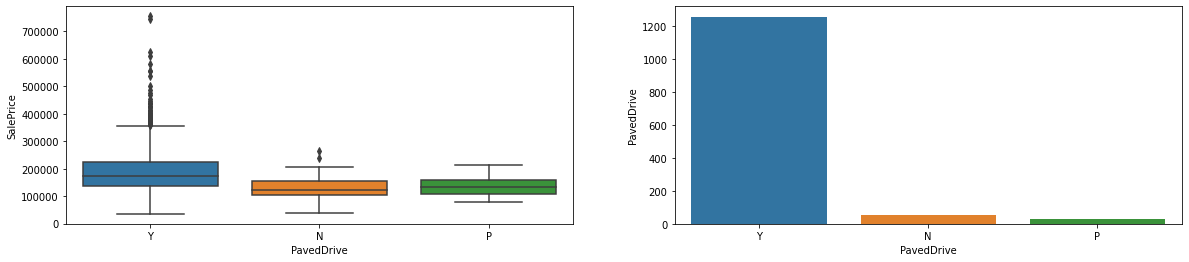

*************************
37 . SaleType
-------------------------
WD       86.611818
New       8.676141
COD       3.141361
ConLD     0.448766
ConLI     0.299177
CWD       0.299177
ConLw     0.299177
Con       0.149589
Oth       0.074794
Name: SaleType, dtype: float64


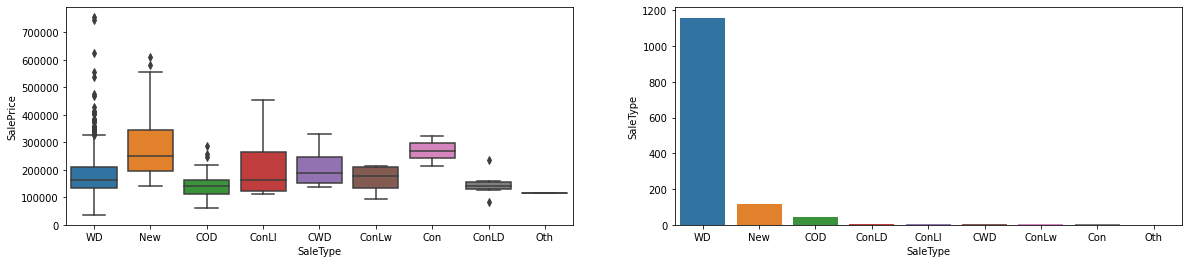

*************************
38 . SaleCondition
-------------------------
Normal     82.572924
Partial     8.900524
Abnorml     6.432311
Family      1.495886
Alloca      0.523560
AdjLand     0.074794
Name: SaleCondition, dtype: float64


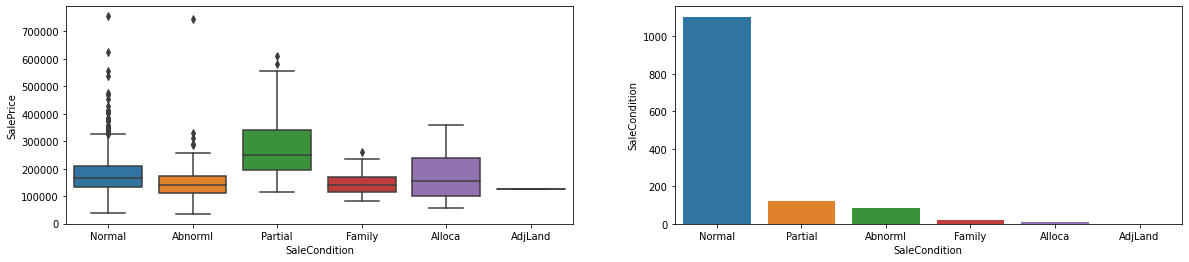

*************************


In [1753]:
# check the data values in different categorical columns
i = 1
for col in df_cat.columns:
  print(i,".",col)
  i+=1
  print('-'* 25)
  print(100*house_df[col].value_counts(normalize = True))
  plt.figure(figsize = [20,4])
  plt.subplot(121)
  sns.boxplot(x = house_df[col],y = house_df['SalePrice'])
  plt.subplot(122)
  plt.ylabel('Density')
  plt.xlabel(col)
  sns.barplot(x= house_df[col].value_counts().index,y = house_df[col].value_counts())
  plt.show()
  print('*'*25)

Observation:
- Some of the highly skewed columns are:
- 'Street','Utilities','RoofMatl','Heating','Condition2','LandSlope','GarageCond','GarageQual'


In [1754]:
# analyse highly skwed columns
highly_skewed_columns = ['Street','Utilities','RoofMatl','Heating','Condition2','LandSlope','GarageCond','GarageQual']

for col in highly_skewed_columns:
  print(house_df[col].value_counts(normalize= True))
  print('-'*25)

Pave    0.99626
Grvl    0.00374
Name: Street, dtype: float64
-------------------------
AllPub    0.999252
NoSeWa    0.000748
Name: Utilities, dtype: float64
-------------------------
CompShg    0.982797
Tar&Grv    0.006731
WdShngl    0.004488
WdShake    0.003740
Membran    0.000748
Roll       0.000748
Metal      0.000748
Name: RoofMatl, dtype: float64
-------------------------
GasA    0.985041
GasW    0.011967
Grav    0.002244
OthW    0.000748
Name: Heating, dtype: float64
-------------------------
Norm      0.989529
Feedr     0.003740
Artery    0.001496
RRNn      0.001496
PosN      0.001496
PosA      0.000748
RRAn      0.000748
RRAe      0.000748
Name: Condition2, dtype: float64
-------------------------
Gtl    0.945400
Mod    0.045625
Sev    0.008975
Name: LandSlope, dtype: float64
-------------------------
TA    0.961855
Fa    0.024682
Gd    0.006731
Po    0.005236
Ex    0.001496
Name: GarageCond, dtype: float64
-------------------------
TA    0.949140
Fa    0.035901
Gd    0.010471


##### dropping High skewed values

In [1755]:
house_df.drop(['Street','Utilities','RoofMatl','Heating','Condition2','LandSlope','GarageCond','GarageQual'],axis = 1, inplace=True)

### Step 4 Data Preparation

- Target variable is Transformed to normal distribution.
-  Numerical and categorical variablesare separated.
-Categorical values further divided into ordinal and nominal.
-Ordinal are label encoded.
-Nominal are converted into dummy variables.
-Numerical and Label encoded ordinal columns are scaled.


In [1756]:
# inspect data types
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1337 non-null   int64  
 1   MSZoning       1337 non-null   object 
 2   LotFrontage    1337 non-null   float64
 3   LotArea        1337 non-null   float64
 4   LotShape       1337 non-null   object 
 5   LandContour    1337 non-null   object 
 6   LotConfig      1337 non-null   object 
 7   Neighborhood   1337 non-null   object 
 8   Condition1     1337 non-null   object 
 9   BldgType       1337 non-null   object 
 10  HouseStyle     1337 non-null   object 
 11  OverallQual    1337 non-null   int64  
 12  OverallCond    1337 non-null   int64  
 13  RoofStyle      1337 non-null   object 
 14  Exterior1st    1337 non-null   object 
 15  Exterior2nd    1337 non-null   object 
 16  MasVnrType     1337 non-null   object 
 17  MasVnrArea     1337 non-null   float64
 18  ExterQua

In [1757]:
# Separate Target and  independent variables
y = house_df['SalePrice']
X = house_df.drop('SalePrice',axis = 1)



#### Power Transfer of Target variable

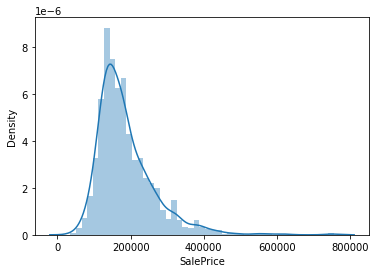

In [1758]:
# inspecting distribution of Target Variable 'SalePrice' before power transformation
sns.distplot(y)

In [1759]:
# apply power transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox',standardize=True)
y = pt.fit_transform(np.array(y).reshape(-1,1))

y = pd.DataFrame(y, columns = ['SalePrice'])
y.head()

,SalePrice
0,0.520110
1,0.158470
2,0.697530
3,-0.546112
4,0.978535


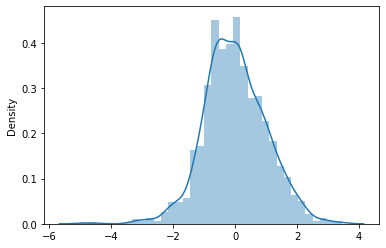

SalePrice   -1.048222e-14
dtype: float64 SalePrice    1.0
dtype: float64


In [1760]:
# inspecting distribution of Target Variable 'SalePrice' after power transformation 
sns.distplot(y)
plt.show()
print(np.mean(y),np.std(y))

Observation:
- Transformed target variable is normalised with mean as zero and standard deviationas 1

#### Separate numerical and categorical variables
- we are separating numerical columns and categorical columns because they are treated separately.
- numerical columns are scaled while for categorical values dummy values are created.

In [1761]:
# separate categorical and numerical
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include=['int64','float64'])

#### Identifying ordinal and nominal category

In [1762]:
# check the data values in different categorical columns
i = 1
for col in X_cat.columns:
  print(i,".",col)
  i+=1
  print('-'* 25)
  print(X[col].value_counts())
  print('*'*25)

1 . MSZoning
-------------------------
RL         1065
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
*************************
2 . LotShape
-------------------------
Reg    829
IR1    459
IR2     40
IR3      9
Name: LotShape, dtype: int64
*************************
3 . LandContour
-------------------------
Lvl    1206
Bnk      51
HLS      48
Low      32
Name: LandContour, dtype: int64
*************************
4 . LotConfig
-------------------------
Inside     957
Corner     243
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
*************************
5 . Neighborhood
-------------------------
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     69
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV    

In [1763]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1337 non-null   object
 1   LotShape       1337 non-null   object
 2   LandContour    1337 non-null   object
 3   LotConfig      1337 non-null   object
 4   Neighborhood   1337 non-null   object
 5   Condition1     1337 non-null   object
 6   BldgType       1337 non-null   object
 7   HouseStyle     1337 non-null   object
 8   RoofStyle      1337 non-null   object
 9   Exterior1st    1337 non-null   object
 10  Exterior2nd    1337 non-null   object
 11  MasVnrType     1337 non-null   object
 12  ExterQual      1337 non-null   object
 13  ExterCond      1337 non-null   object
 14  Foundation     1337 non-null   object
 15  BsmtQual       1337 non-null   object
 16  BsmtCond       1337 non-null   object
 17  BsmtExposure   1337 non-null   object
 18  BsmtFinType1   1337 non-null

In [1764]:
# separate ordinal and nominal data
nominal_list = ['MSZoning','LotShape','LandContour','LotConfig',
              'Neighborhood','Condition1','BldgType','HouseStyle',
              'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation',
              'BsmtExposure','Electrical','Functional','GarageFinish','GarageType',
              'PavedDrive','SaleType','SaleCondition']

ordinal_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1',
                'BsmtFinType2','HeatingQC','KitchenQual']



#### LabelEncoding for ordinal columns

In [1765]:
# manual Label Encoding to Ordinal columns

X.loc[X['CentralAir'] == 'Y','CentralAir'] = 1
X.loc[X['CentralAir'] == 'N','CentralAir'] = 0
X['CentralAir'].value_counts()

1    1276
0      61
Name: CentralAir, dtype: int64

In [1766]:
X.loc[X['ExterQual'] == 'Ex','ExterQual'] = 4
X.loc[X['ExterQual'] == 'Gd','ExterQual'] = 3
X.loc[X['ExterQual'] == 'TA','ExterQual'] = 2
X.loc[X['ExterQual'] == 'Fa','ExterQual'] = 1
X['ExterQual'].value_counts()

2    803
3    477
4     50
1      7
Name: ExterQual, dtype: int64

In [1767]:
X.loc[X['ExterCond'] == 'Ex','ExterCond'] = 4
X.loc[X['ExterCond'] == 'Gd','ExterCond'] = 3
X.loc[X['ExterCond'] == 'TA','ExterCond'] = 2
X.loc[X['ExterCond'] == 'Fa','ExterCond'] = 1
X['ExterCond'].value_counts()

2    1182
3     137
1      16
4       2
Name: ExterCond, dtype: int64

In [1768]:
X.loc[X['BsmtQual'] == 'Ex','BsmtQual'] = 4
X.loc[X['BsmtQual'] == 'Gd','BsmtQual'] = 3
X.loc[X['BsmtQual'] == 'TA','BsmtQual'] = 2
X.loc[X['BsmtQual'] == 'Fa','BsmtQual'] = 1
X['BsmtQual'].value_counts()

2    594
3    592
4    119
1     32
Name: BsmtQual, dtype: int64

In [1769]:
X.loc[X['BsmtCond'] == 'Gd','BsmtCond'] = 4
X.loc[X['BsmtCond'] == 'TA','BsmtCond'] = 3
X.loc[X['BsmtCond'] == 'Fa','BsmtCond'] = 2
X.loc[X['BsmtCond'] == 'Po','BsmtCond'] = 1
X['BsmtCond'].value_counts()

3    1236
4      62
2      38
1       1
Name: BsmtCond, dtype: int64

In [1770]:
X.loc[X['BsmtFinType1'] == 'GLQ','BsmtFinType1'] = 6
X.loc[X['BsmtFinType1'] == 'ALQ','BsmtFinType1'] = 5
X.loc[X['BsmtFinType1'] == 'BLQ','BsmtFinType1'] = 4
X.loc[X['BsmtFinType1'] == 'Rec','BsmtFinType1'] = 3
X.loc[X['BsmtFinType1'] == 'LwQ','BsmtFinType1'] = 2
X.loc[X['BsmtFinType1'] == 'Unf','BsmtFinType1'] = 1
X.loc[X['BsmtFinType1'] == 'NA','BsmtFinType1'] = 0
X['BsmtFinType1'].value_counts()

6    401
1    392
5    209
4    141
3    125
2     69
Name: BsmtFinType1, dtype: int64

In [1771]:
X.loc[X['BsmtFinType2'] == 'GLQ','BsmtFinType2'] = 6
X.loc[X['BsmtFinType2'] == 'ALQ','BsmtFinType2'] = 5
X.loc[X['BsmtFinType2'] == 'BLQ','BsmtFinType2'] = 4
X.loc[X['BsmtFinType2'] == 'Rec','BsmtFinType2'] = 3
X.loc[X['BsmtFinType2'] == 'LwQ','BsmtFinType2'] = 2
X.loc[X['BsmtFinType2'] == 'Unf','BsmtFinType2'] = 1
X.loc[X['BsmtFinType2'] == 'NA','BsmtFinType2'] = 0
X['BsmtFinType2'].value_counts()

1    1175
3      53
2      46
4      32
5      19
6      12
Name: BsmtFinType2, dtype: int64

In [1772]:
X.loc[X['HeatingQC'] == 'Ex','HeatingQC'] = 5
X.loc[X['HeatingQC'] == 'Gd','HeatingQC'] = 4
X.loc[X['HeatingQC'] == 'TA','HeatingQC'] = 3
X.loc[X['HeatingQC'] == 'Fa','HeatingQC'] = 2
X.loc[X['HeatingQC'] == 'Po','HeatingQC'] = 1
X['HeatingQC'].value_counts()

5    703
3    380
4    217
2     36
1      1
Name: HeatingQC, dtype: int64

In [1773]:
X.loc[X['KitchenQual'] == 'Ex','KitchenQual'] = 5
X.loc[X['KitchenQual'] == 'Gd','KitchenQual'] = 4
X.loc[X['KitchenQual'] == 'TA','KitchenQual'] = 3
X.loc[X['KitchenQual'] == 'Fa','KitchenQual'] = 2
X.loc[X['KitchenQual'] == 'Po','KitchenQual'] = 1
X['KitchenQual'].value_counts()

3    650
4    568
5     96
2     23
Name: KitchenQual, dtype: int64

In [1774]:
X[ordinal_list] = X[ordinal_list].astype('int')
X['CentralAir'] = X['CentralAir'].astype('int')
X[ordinal_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ExterQual     1337 non-null   int64
 1   ExterCond     1337 non-null   int64
 2   BsmtQual      1337 non-null   int64
 3   BsmtCond      1337 non-null   int64
 4   BsmtFinType1  1337 non-null   int64
 5   BsmtFinType2  1337 non-null   int64
 6   HeatingQC     1337 non-null   int64
 7   KitchenQual   1337 non-null   int64
dtypes: int64(8)
memory usage: 134.0 KB


In [1775]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1337 non-null   int64  
 1   MSZoning       1337 non-null   object 
 2   LotFrontage    1337 non-null   float64
 3   LotArea        1337 non-null   float64
 4   LotShape       1337 non-null   object 
 5   LandContour    1337 non-null   object 
 6   LotConfig      1337 non-null   object 
 7   Neighborhood   1337 non-null   object 
 8   Condition1     1337 non-null   object 
 9   BldgType       1337 non-null   object 
 10  HouseStyle     1337 non-null   object 
 11  OverallQual    1337 non-null   int64  
 12  OverallCond    1337 non-null   int64  
 13  RoofStyle      1337 non-null   object 
 14  Exterior1st    1337 non-null   object 
 15  Exterior2nd    1337 non-null   object 
 16  MasVnrType     1337 non-null   object 
 17  MasVnrArea     1337 non-null   float64
 18  ExterQua

#### Create dummy variables for nominal columns


In [1776]:
# create a new dataframe with dummy variables
df = pd.get_dummies(X[nominal_list], drop_first= True, prefix_sep= '_')
df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1777]:
# drop parent columns from main DataFrame and concate dummy dataFrame with  main DataFrame

# drop
X.drop(nominal_list, axis = 1, inplace = True)

# dummy dataframe with main data frame
X = pd.concat([X,df], axis = 1)
X.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1459
Data columns (total 163 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotFrontage            float64
 2   LotArea                float64
 3   OverallQual            int64  
 4   OverallCond            int64  
 5   MasVnrArea             float64
 6   ExterQual              int64  
 7   ExterCond              int64  
 8   BsmtQual               int64  
 9   BsmtCond               int64  
 10  BsmtFinType1           int64  
 11  BsmtFinSF1             int64  
 12  BsmtFinType2           int64  
 13  BsmtUnfSF              int64  
 14  HeatingQC              int64  
 15  CentralAir             int64  
 16  1stFlrSF               int64  
 17  2ndFlrSF               int64  
 18  GrLivArea              int64  
 19  BsmtFullBath           int64  
 20  FullBath               int64  
 21  HalfBath               int64  
 22  BedroomAbvGr           

#### Scaling Numerical columns and Label Encoded ordinal columns

- first split the data in train and test before scaling

In [1778]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.8, random_state = 772)

In [1779]:
X_test.shape,X_train.shape

((268, 163), (1069, 163))

Inspect the distribution of target variable in train and test.

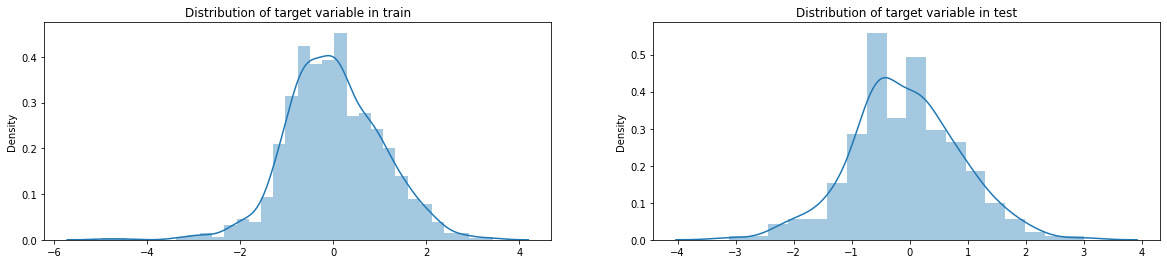

In [1780]:
plt.figure(figsize = [20,4])
plt.subplot(121)
plt.title("Distribution of target variable in train")
sns.distplot(y_train)
plt.subplot(122)
plt.title("Distribution of target variable in test")
sns.distplot(y_test)
plt.show()

- Scaling numerical columns and label encoded ordinal columns

In [1781]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# combining numerical columns
num_col_list = list(X_num.columns)  
num_col_list = num_col_list + ordinal_list

# fit and transform train dataset
X_train[num_col_list] = scaler.fit_transform(X_train[num_col_list])

# transform test data
X_test[num_col_list] = scaler.transform(X_test[num_col_list])
X_train[num_col_list].describe()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,age,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual
count,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03
mean,2.792434e-16,6.626027e-17,-1.018830e-16,6.563713e-17,-1.948343e-16,-3.512937e-17,3.198772e-17,1.672085e-16,-3.051815e-16,-3.252777e-16,-1.246275e-16,-1.119570e-16,-6.314458e-17,4.361961e-17,8.723923e-17,-2.575634e-17,1.092567e-16,2.889280e-16,5.878262e-17,1.978072e-16,-9.157522e-17,-2.162287e-16,-7.830759e-17,-2.351305e-16,4.154249e-17,8.020816e-16,1.827870e-17,1.881875e-16,3.219543e-16,-3.011830e-16
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-8.883070e-01,-2.447693e+00,-1.703831e+00,-3.185759e+00,-3.346402e+00,-5.917263e-01,-1.066963e+00,-1.321734e+00,-1.971760e+00,-8.181735e-01,-2.152421e+00,-8.377217e-01,-2.895731e+00,-7.936900e-01,-3.736063e+00,-2.290013e+00,-1.033663e+00,-1.362417e+00,-1.818764e+00,-7.655633e-01,-7.261483e-01,-1.763017e+00,-2.474979e+00,-3.280228e+00,-2.305449e+00,-7.207841e+00,-1.323999e+00,-3.204590e-01,-3.372578e+00,-2.342902e+00
25%,-8.883070e-01,-5.123594e-01,-4.579745e-01,-9.368643e-01,-5.689922e-01,-5.917263e-01,-1.066963e+00,-7.525498e-01,-7.434672e-01,-8.181735e-01,-7.199865e-01,-8.377217e-01,-1.067298e+00,-7.936900e-01,-1.138436e+00,-3.669777e-01,-1.033663e+00,-1.362417e+00,-7.187366e-01,-7.655633e-01,-7.261483e-01,-9.856952e-01,-7.547239e-01,-2.728835e-01,-8.642064e-01,-6.017678e-02,-1.323999e+00,-3.204590e-01,-1.256800e+00,-8.323095e-01
50%,-1.642504e-01,2.157407e-02,-1.129680e-01,-1.872326e-01,-5.689922e-01,-5.917263e-01,-1.072222e-01,-2.036940e-01,-1.984456e-01,-8.181735e-01,-1.163455e-01,-8.377217e-01,7.611343e-01,-7.936900e-01,1.603773e-01,-3.669777e-01,5.074607e-01,1.985945e-01,-9.698186e-02,-7.655633e-01,-2.966609e-01,2.086399e-01,-7.547239e-01,-2.728835e-01,5.770364e-01,-6.017678e-02,1.452276e-01,-3.204590e-01,8.589783e-01,-8.323095e-01
75%,3.184539e-01,4.801191e-01,2.927980e-01,5.623991e-01,3.568109e-01,3.377722e-01,6.125835e-01,5.190790e-01,6.443439e-01,8.638936e-01,4.814726e-01,1.109071e+00,7.611343e-01,1.221642e+00,1.603773e-01,2.740340e-01,5.074607e-01,1.985945e-01,4.556890e-01,5.683379e-01,3.475703e-01,7.853126e-01,9.655316e-01,-2.728835e-01,5.770364e-01,-6.017678e-02,1.124712e+00,-3.204590e-01,8.589783e-01,6.782828e-01
max,3.214680e+00,5.274188e+00,5.661617e+00,2.811294e+00,3.134220e+00,7.858260e+00,4.097357e+00,3.954509e+00,5.445851e+00,3.844201e+00,6.073401e+00,3.055863e+00,2.589567e+00,3.236973e+00,4.056818e+00,3.479093e+00,3.589708e+00,3.320618e+00,4.717631e+00,5.880677e+00,7.664196e+00,1.854827e+00,2.685787e+00,5.741806e+00,2.018279e+00,3.513655e+00,1.124712e+00,5.427371e+00,8.589783e-01,2.188875e+00


### Step 5 Model Buiding and Evaluation

In [1782]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

##### Feature Selection using RFE
- selecting top 50 features out 164, on which Ridge and Lasso willbe performed.

In [1783]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe =RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

col = X_train.columns[rfe.support_]
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MSSubClass', False, 50),
 ('LotFrontage', False, 87),
 ('LotArea', False, 23),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 102),
 ('ExterQual', False, 94),
 ('ExterCond', False, 92),
 ('BsmtQual', False, 46),
 ('BsmtCond', False, 103),
 ('BsmtFinType1', False, 97),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 90),
 ('BsmtUnfSF', False, 74),
 ('HeatingQC', False, 69),
 ('CentralAir', True, 1),
 ('1stFlrSF', False, 26),
 ('2ndFlrSF', False, 27),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 48),
 ('FullBath', False, 88),
 ('HalfBath', False, 72),
 ('BedroomAbvGr', False, 79),
 ('KitchenQual', False, 86),
 ('TotRmsAbvGrd', False, 67),
 ('Fireplaces', False, 52),
 ('GarageCars', False, 10),
 ('GarageArea', False, 60),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 83),
 ('age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 53),
 ('LotShape_IR3'

In [1784]:
X_train= X_train[col]
X_test = X_test[col]
X_test.shape,X_train.shape


((268, 50), (1069, 50))

In [1785]:
# top 50 columns
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'CentralAir', 'GrLivArea',
       'age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Exterior2nd_Stone',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_Stone', 'Foundation_Wood', 'Electrical_Mix',
       'Functional_Maj2', 'Functional_Sev', 'GarageType_CarPort',
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleTyp

#### Building model using Ridge

In [1786]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001,0.002,0.003,0.004,0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500 ]}

ridge = Ridge()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = ridge,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)


Fitting 8 folds for each of 31 candidates, totalling 248 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    3.1s finished


GridSearchCV(cv=8, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1787]:
# analysing score 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
cv_results.sort_values(by = 'rank_test_score',).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,mean_train_score,std_train_score
18,0.005376,0.000105,0.002468,0.000075,2,{'alpha': 2.0},-0.209095,-0.238644,-0.262996,-0.222264,-0.257710,-0.252899,-0.265968,-0.239588,-0.243645,0.018870,1,-0.233221,-0.228055,-0.224500,-0.230753,-0.225923,-0.227227,-0.227064,-0.229544,-0.228286,0.002613
17,0.007013,0.003007,0.002524,0.000156,1,{'alpha': 1.0},-0.210790,-0.241881,-0.262042,-0.224029,-0.256575,-0.251530,-0.264574,-0.238226,-0.243706,0.017686,2,-0.231171,-0.226064,-0.222747,-0.228454,-0.224170,-0.225229,-0.225706,-0.227541,-0.226385,0.002464
16,0.005593,0.000104,0.002623,0.000402,0.9,{'alpha': 0.9},-0.211133,-0.242269,-0.261904,-0.224288,-0.256386,-0.251310,-0.264449,-0.238231,-0.243746,0.017501,3,-0.230953,-0.225857,-0.222569,-0.228165,-0.223983,-0.225029,-0.225557,-0.227327,-0.226180,0.002442
15,0.005558,0.000248,0.002530,0.000111,0.8,{'alpha': 0.8},-0.211502,-0.242668,-0.261745,-0.224577,-0.256187,-0.251052,-0.264297,-0.238253,-0.243785,0.017295,4,-0.230740,-0.225732,-0.222380,-0.227855,-0.223783,-0.224814,-0.225409,-0.227092,-0.225975,0.002422
14,0.005483,0.000069,0.002604,0.000066,0.7,{'alpha': 0.7},-0.211900,-0.243090,-0.261568,-0.224887,-0.255956,-0.250934,-0.264110,-0.238339,-0.243848,0.017075,5,-0.230570,-0.225595,-0.222265,-0.227515,-0.223619,-0.224580,-0.225255,-0.226826,-0.225778,0.002393


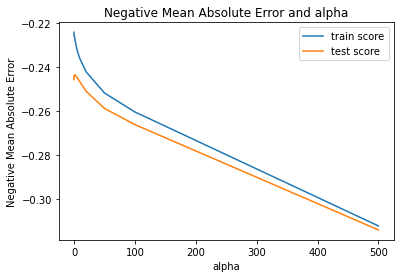

In [1788]:
# plotting graph


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1789]:
model_cv.best_estimator_, model_cv.best_score_

(Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 -0.2436454569804997)

Rebuild of model with fine tuning of alpha

Fitting 7 folds for each of 24 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    1.2s finished


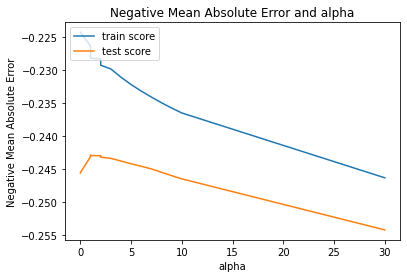

In [1790]:
# list of alphas to tune
params = {'alpha': [ 0.001,0.01,1,1.2,1.4,1.6,1.8,1.9,1.95,2,2.05,2.1,2.2,2.4,2.6,3,4,5,6,7,8,9,10,30 ]}


ridge = Ridge()

#cross vaidation
folds = 7
model_cv = GridSearchCV(estimator  = ridge,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1791]:
model_cv.best_estimator_, model_cv.best_score_

(Ridge(alpha=1.8, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 -0.24291604630055777)

Rebuild

Fitting 7 folds for each of 27 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    1.3s finished


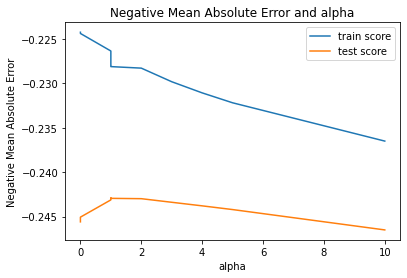

In [1792]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01,0.1,1,1.2,1.4,1.6,1.7,1.72,1.74,1.75,1.76,1.77,1.78,1.79,1.8,1.82,1.84,1.86,1.88,1.9,2.0,3,4,5,10]} 


ridge = Ridge()

#cross vaidation
folds = 7
model_cv = GridSearchCV(estimator  = ridge,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1793]:
model_cv.best_estimator_,model_cv.best_score_

(Ridge(alpha=1.77, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 -0.2429104122222167)

##### Finally build a model alpha 1.77

In [1794]:
ridge = Ridge(alpha= 1.77)
ridge.fit(X_train,y_train)

Ridge(alpha=1.77, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

##### Evaluating Model

In [1795]:
# predict train 
y_train_pred = ridge.predict(X_train)

# predict Test
y_test_pred = ridge.predict(X_test)

# calculate r squared
r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)

(0.894642143753855, 0.8742172926959446)

In [1796]:
coef = ridge.coef_.reshape(-1,)
coef.shape

(50,)

##### Top features of the model

In [1797]:

feature_coeff_df = pd.DataFrame({'Feature':X_train.columns,'coeff':coef})
feature_coeff_df.sort_values(by = 'coeff', ascending = False).head(20)

,Feature,coeff
8,MSZoning_RL,0.808361
9,MSZoning_RM,0.597123
12,LandContour_Low,0.499969
7,MSZoning_RH,0.493353
6,MSZoning_FV,0.477342
4,GrLivArea,0.429128
3,CentralAir,0.377259
21,Neighborhood_Somerst,0.363249
23,Neighborhood_Veenker,0.266878
16,Neighborhood_Crawfor,0.256533


#### Build a model using Lasso

Fitting 8 folds for each of 27 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    1.8s finished


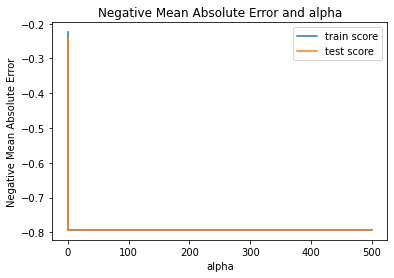

In [1798]:


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500 ]}

lasso = Lasso()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = lasso,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1799]:
# Analyse score
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,mean_train_score,std_train_score
0,0.029099,0.009371,0.003331,0.000553,0,{'alpha': 0.0001},-0.214858,-0.245946,-0.260571,-0.227543,-0.252809,-0.253440,-0.261435,-0.251489,-0.246011,0.015382,2,-0.229591,-0.224777,-0.221964,-0.226541,-0.223105,-0.223124,-0.224392,-0.223945,-0.224680,0.002250
1,0.014571,0.003362,0.003948,0.001397,0,{'alpha': 0.001},-0.210671,-0.237008,-0.265390,-0.220726,-0.256321,-0.254979,-0.269596,-0.247860,-0.245319,0.019645,1,-0.236205,-0.230313,-0.227170,-0.234556,-0.229401,-0.230807,-0.230270,-0.232124,-0.231356,0.002699
2,0.009598,0.004272,0.003143,0.001121,0,{'alpha': 0.01},-0.237663,-0.254435,-0.287157,-0.259037,-0.276164,-0.272280,-0.309820,-0.291368,-0.273490,0.021478,3,-0.269680,-0.270692,-0.263688,-0.269600,-0.265023,-0.263675,-0.264073,-0.266649,-0.266635,0.002764
3,0.008194,0.002111,0.004321,0.002467,0,{'alpha': 0.05},-0.258862,-0.276903,-0.314800,-0.289998,-0.272657,-0.283144,-0.351758,-0.296138,-0.293032,0.027116,4,-0.293312,-0.290837,-0.286231,-0.292743,-0.285042,-0.291175,-0.286032,-0.289598,-0.289371,0.003002
4,0.007362,0.001635,0.003053,0.000353,0,{'alpha': 0.1},-0.283800,-0.319115,-0.355102,-0.331973,-0.291531,-0.325935,-0.396785,-0.330894,-0.329392,0.033244,5,-0.330636,-0.328385,-0.323773,-0.329776,-0.316417,-0.327213,-0.322182,-0.329892,-0.326034,0.004602


In [1800]:
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), -0.24531885729880232)

Rebuild with fine tuning of alpha

Fitting 8 folds for each of 29 candidates, totalling 232 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    1.9s finished


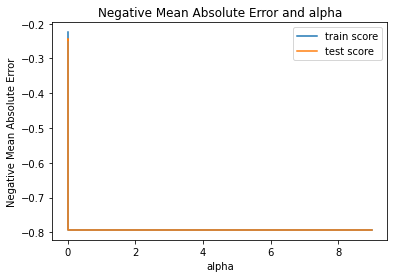

In [1801]:
# list of alphas to tune

params = {'alpha': [0.0001,0.0002,0.0004,0.0006,0.0008,.001,
                    0.002,0.004,0.006, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}



lasso = Lasso()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = lasso,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1802]:
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), -0.2450191033761912)

Rebuild with fine tuning of alpha

Fitting 8 folds for each of 32 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    2.1s finished


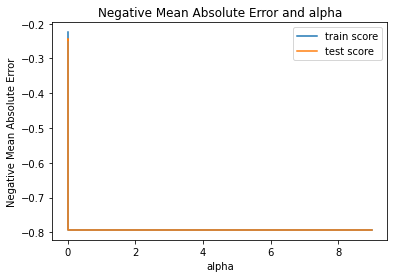

In [1803]:
# list of alphas to tune

params = {'alpha': [0.0001,0.0002,0.0004,0.0005,0.0006,0.0007,0.0008,0.001,
                    0.002,.003,0.004,0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}


lasso = Lasso()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = lasso,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1804]:
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), -0.2450191033761912)

##### Finally build a model with alpha 0.0006

In [1805]:
lasso = Lasso(alpha = 0.0006)

lasso.fit(X_train,y_train)


Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

##### Evaluate Model

In [1806]:

# perdict train dataset
y_train_pred = lasso.predict(X_train)

# predict test dataset
y_test_pred = lasso.predict(X_test)


# check r squared
r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)

(0.8952353249712862, 0.8758527203390419)

In [1807]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train['SalePrice'],y_train_pred)), np.sqrt(mean_squared_error(y_test['SalePrice'],y_test_pred))

(0.3290241978003221, 0.3268924934476079)

##### Top features of model 

In [1808]:
lasso_features = pd.DataFrame({'Features':X_train.columns,'coeff':lasso.coef_})
lasso_features.sort_values(by= 'coeff',ascending = False).head(20)

,Features,coeff
8,MSZoning_RL,1.084607
9,MSZoning_RM,0.869483
7,MSZoning_RH,0.781498
6,MSZoning_FV,0.757277
12,LandContour_Low,0.510034
4,GrLivArea,0.428764
21,Neighborhood_Somerst,0.361344
3,CentralAir,0.358597
16,Neighborhood_Crawfor,0.254645
23,Neighborhood_Veenker,0.250444


#### __Question 3__

- Creating another train adn test dataset without those top 5 features.

In [1809]:
top_5_features = ['MSZoning_RL','MSZoning_RM','MSZoning_RH','MSZoning_FV','LandContour_Low']

In [1810]:
# new trainand test dataset
X_train_ques3 = X_train.drop(top_5_features, axis = 1)
X_test_ques3 = X_test.drop(top_5_features, axis = 1)

In [1811]:
X_train_ques3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 271 to 35
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1069 non-null   float64
 1   OverallCond           1069 non-null   float64
 2   BsmtFinSF1            1069 non-null   float64
 3   CentralAir            1069 non-null   int64  
 4   GrLivArea             1069 non-null   float64
 5   age                   1069 non-null   float64
 6   LotShape_IR3          1069 non-null   uint8  
 7   LandContour_HLS       1069 non-null   uint8  
 8   LandContour_Lvl       1069 non-null   uint8  
 9   LotConfig_FR3         1069 non-null   uint8  
 10  Neighborhood_BrDale   1069 non-null   uint8  
 11  Neighborhood_Crawfor  1069 non-null   uint8  
 12  Neighborhood_Edwards  1069 non-null   uint8  
 13  Neighborhood_MeadowV  1069 non-null   uint8  
 14  Neighborhood_NridgHt  1069 non-null   uint8  
 15  Neighborhood_OldTown 

Build model again using Lasso

Fitting 8 folds for each of 27 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    1.6s finished


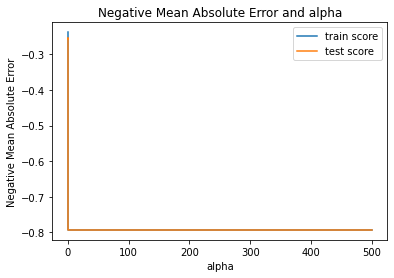

In [1812]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500 ]}

lasso = Lasso()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = lasso,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train_ques3,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1813]:
# check best score
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), -0.25479819269000686)

Retry with new listof alpha

Fitting 8 folds for each of 44 candidates, totalling 352 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 352 out of 352 | elapsed:    2.5s finished


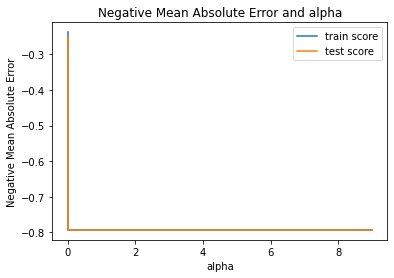

In [1814]:
params = {'alpha': [0.0001,0.0008,0.00085,0.00088,0.00090,0.00092,0.00095,0.00098,.001,0.00102,0.00105,0.00108,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0017,0.0018,
                    0.002,.003,0.004,0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}
lasso = Lasso()

#cross vaidation
folds = 8
model_cv = GridSearchCV(estimator  = lasso,
                        param_grid= params,
                        scoring = "neg_mean_absolute_error",
                        cv = folds,
                        verbose = 1, n_jobs  =-1,
                        return_train_score = True)

model_cv.fit(X_train_ques3,y_train)

# dataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1815]:
# check best score
model_cv.best_estimator_, model_cv.best_score_

(Lasso(alpha=0.00092, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False), -0.2547595542557683)

In [1816]:
lasso = Lasso(alpha = 0.00092)

lasso.fit(X_train_ques3,y_train)

Lasso(alpha=0.00092, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1817]:
lasso.coef_.shape

(45,)

In [1818]:
# check r squared

y_train_pred_ques3 = lasso.predict(X_train_ques3)
y_test_pred_ques3 = lasso.predict(X_test_ques3)

r2_score(y_train,y_train_pred_ques3),r2_score(y_test,y_test_pred_ques3)

(0.8770435934900979, 0.8786993938421102)

In [1819]:
lasso_features = pd.DataFrame({'Features':X_train_ques3.columns,'coeff':lasso.coef_})
lasso_features.sort_values(by= 'coeff',ascending = False).head(20)

,Features,coeff
3,CentralAir,0.467115
4,GrLivArea,0.430751
11,Neighborhood_Crawfor,0.266228
0,OverallQual,0.260098
18,Neighborhood_Veenker,0.249087
42,SaleType_New,0.247273
17,Neighborhood_StoneBr,0.209127
14,Neighborhood_NridgHt,0.196547
44,SaleCondition_Normal,0.179458
25,Exterior1st_BrkFace,0.171039
